# Modélisation des dynamiques du monde

En premier, pour afficher les boutons et les graphiques d'aides, vous devriez dans **la barre d'outils*** ci-dessus, cliquer sur **Run** > **Run All Cells**.  
N'oubliez pas de revenir ici une fois cela fait, car l'execution vous enverra tout à la fin.

## Idée

Difficile de se retrouver à travers les quantités innombrables d'informations à propos de phénomènes qui pourraient survenir dans un futur proche. Le but de cette séance est de tenter de modéliser les principales dynamiques qui régissent le monde industrialisé, pour tenter de fournir une vision plus englobante et plus précise des avenirs potentiels, probables ou souhaitables.

| Le monde industrialisé |
| :--: |
|![intro](https://gitlab.inria.fr/abaucher/pydynamo/-/raw/TPworld3/images_TP/intro.png)|
|Pour ces références de ces images, voir le fichier https://gitlab.inria.fr/abaucher/pydynamo/-/raw/TPworld3/images_TP/sources.md)|

## C'est quoi ce format de documment

Afin que vous puissiez expérimenter aussi librement que possible nous vous avons fourni un notebook, qui est capable d'executer du code, contenir du texte et afficher les graphiques produits.  
Un notebook se lit de haut en bas, et il faut exécuter les cellules de code **dans l'ordre** ([voir les commandes Jupyter expliquées ici](#7.1.-Commandes-Jupyter-Notebook)) afin de pouvoir afficher les graphiques et manipuler vos expériences. Pour commencer, exécuter la cellule ci-dessous en cliquant dessus puis sur le bouton &#9658; Run, ou bien avec **Ctrl + Entrée**.

De plus, gardez bien en tête qu'il n'est pas question d'atteindre un unique configuration. Il existe de multiples manière d'atteindre les objectifs évoqués dans la suite; et ils ne sont d'ailleurs pas les seuls objectifs possibles. Il ne tient qu'a vous de vous fixer d'autres objectifs, de tester d'autres configurations. Plus les savoirs sont divers et nombreux plus les discussions sont intéressantes. N'oubliez donc pas que vous êtes en groupe, et même, plusieurs groupe.

In [1]:
# Exemple de cellule de code (à exécuter !)

# Commande pour importer la classe World3
from pydynamo import World3
from IPython.display import display, clear_output, Markdown, HTML, Javascript
from IPython.core.magic import register_cell_magic
from ipywidgets import widgets,IntSlider


# Commande pour importer et utiliser en direct une bibliothèque graphique
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
cdn_resources='remote'

In [2]:
### Case de Fonctionnement ###
###################################################################################################################################################
def encrypt(text):
    shift = 6
    encrypted_text = ""
    
    for char in text:
        if char.isalpha():
            start = ord('A') if char.isupper() else ord('a')
            encrypted_char = chr((ord(char) - start + shift) % 26 + start)
            encrypted_text += encrypted_char
        else:
            encrypted_text += char
    
    return encrypted_text
####################################################################################################################################################
def decrypt(text):
    shift = 6
    decrypted_text = ""
    for char in text:
        if char.isalpha():
            start = ord('A') if char.isupper() else ord('a')
            decrypted_char = chr((ord(char) - start - shift) % 26 + start)
            decrypted_text += decrypted_char
        else:
            decrypted_text += char
    return decrypted_text
#####################################################################################################################################################
def calculate_reps(msg1, rep1 = "", att1 = "", msg2="", rep2="", att2=""):
    
    if rep1.lower() == decrypt(att1.lower()):
        srt1 = decrypt(msg1)
    else:
        srt1 = "C'est surement une pas si mauvaise idée mais les graphiques semblent montrer une variable plus evidente"
    
    if rep2.lower() == decrypt(att2.lower()):
        srt2 = decrypt(msg2)
    else:
        srt2 = "C'est surement une pas si mauvaise idée mais les graphiques semblent montrer une variable plus evidente"
    #print("srt1 = "+srt1 + " " +"srt2 = "+srt2 + " "+"rep1 = "+ rep1 + " "+"rep2 = "+rep2 + " "+"att1 = "+att1 + " "+"att2 = "+att2)
    return srt1, srt2
#####################################################################################################################################################
def calculate_reps_indice(indice, msg1, rep1 = "", att1 = "", msg2="", rep2="", att2=""):
    
    if rep1.lower() == decrypt(att1.lower()):
        srt1 = decrypt(msg1)
        flag_1 = 1
    else:
        srt1 = "C'est surement une pas si mauvaise idée mais les graphiques semblent montrer une variable plus evidente"
        flag_1 = 0
    
    if rep2.lower() == decrypt(att2.lower()):
        srt2 = decrypt(msg2)
        flag_2 = 1
    else:
        srt2 = "C'est surement une pas si mauvaise idée mais les graphiques semblent montrer une variable plus evidente"
        flag_2 = 0
    
    if flag_1 * flag_2 != 0:
        ind = decrypt(indice)
        return srt1, srt2, ind
    #print("srt1 = "+srt1 + " " +"srt2 = "+srt2 + " "+"rep1 = "+ rep1 + " "+"rep2 = "+rep2 + " "+"att1 = "+att1 + " "+"att2 = "+att2)
    return srt1, srt2
#####################################################################################################################################################
#####################################################################################################################################################
def on_button_clicked_param(b, output, button, msg1, rep1="", att1="", msg2="", rep2="", att2=""):
    color_init = button.button_style
    with output:
        output.clear_output()
        if output.layout.display == 'none' or output.layout.display == 'init':
            srt1, srt2 = calculate_reps(msg1, rep1, att1, msg2, rep2, att2)
            
            output.layout.display = 'block'
            button.description = "Cacher la verification"
            button.style.button_color = 'Gainsboro'
            button.style.text_color='black'
            output.layout.border = '3px solid blue'
            
            print(srt1)
            if srt2!="":
                print(srt2)
        else:
            output.clear_output()
            output.layout.display = 'none'
            button.description = "Afficher la verification"
            button.style.button_color = '#0d6efd'
            button.style.text_color='white'
#####################################################################################################################################################
def on_button_clicked_param_indice(b, output, button, indice, msg1, rep1="", att1="", msg2="", rep2="", att2=""):
    with output:
        output.clear_output()
        if output.layout.display == 'none':
            srt1, srt2, indice = calculate_reps_indice(indice, msg1, rep1, att1, msg2, rep2, att2)
            
            output.layout.display = 'block'
            button.description = "Cacher la verification"
            button.style.button_color = 'Gainsboro'
            button.style.text_color='black'
            output.layout.border = '3px solid blue'
            
            print(srt1)
            if srt2!="":
                print(srt2)
            if indice != "":
                display(HTML(f'Indice pour la suite : <font color="red">{indice}</font>'))
        else:
            output.clear_output()
            output.layout.display = 'none'
            button.description = "Afficher la verification"
            button.style.text_color='white'
            button.style.button_color = '#0d6efd'
######################################################################################################################################################
def on_button_clicked_param_soluce(b, output, button, msg1, msg2=""):
    with output:
        output.clear_output()
        if output.layout.display == 'none':
            
            output.layout.display = 'block'
            button.description = "Cacher l'explication"
            button.style.button_color = 'Gainsboro'
            button.style.text_color='black'
            output.layout.border = '3px solid green'

            display(HTML(f'Explication 1 : <font color="red">{decrypt(msg1)}</font>. Pensez bien à executer les formules si ce ne sont pas celles que vous aviez trouvé, cela facilitera le reste travail'))
            if msg2 != "":
                display(HTML(f'Explication 2 : <font color="red">{decrypt(msg2)}</font>. Pensez bien à executer les formules si ce ne sont pas celles que vous aviez trouvé, cela facilitera le reste travail'))
        else:
            output.clear_output()
            output.layout.display = 'none'
            button.description = "Afficher l'explication"
            button.style.text_color='white'
            button.style.button_color = '#ffc107'
#######################################################################################################################################################
def verif_value_function(mode,valeur_a_verif,seuil1,msg1,msgErr,msg2="",seuil2=[]):
    srt = decrypt(msgErr)
    true = []
    flag = []
    flag2 = []
    for i in range (len(seuil1)):
        flag.append(0)
        flag2.append(0)
        true.append(1)
        ##############################################
    if seuil2 == []:
        seuil2 = seuil1
        ##############################################
    if mode == 0:#egalité seule
        for i in range(len(seuil1)):
            if valeur_a_verif[i] == seuil1[i]:
                flag[i] = 1
        if flag == true:
            srt = decrypt(msg1)
        ###############################################
    elif mode == 1 : #eq or inf
        for i in range (len(seuil1)):
            if valeur_a_verif[i] == seuil1[i]:
                flag[i] = 1
                flag2[i] = 1
            elif valeur_a_verif[i] < seuil2[i]:
                flag2[i] = 1
        if flag == true:
            srt = decrypt(msg1)
        elif flag2 == true:
            srt = decrypt(msg2)
        ###############################################
    elif mode == 2 : #inf strict:
        for i in range (len(seuil1)):
            if valeur_a_verif[i] < seuil1[i]:
                flag[i] = 1
        if flag == true:
            srt = decrypt(msg1)
        ###############################################
    elif mode == 3 : # eq or sup
        for i in range (len(seuil1)):
            if valeur_a_verif[i] == seuil1[i]:
                flag[i] = 1
                flag2[i] = 1
            elif valeur_a_verif[i] > seuil2[i]:
                flag2[i] = 1
        if flag == true:
            srt = decrypt(msg1)
        elif flag2 == true:
            srt = decrypt(msg2)
        ################################################
    elif mode == 4 : #sup strict:
        for i in range (len(seuil1)):
            if valeur_a_verif[i] > seuil1[i]:
                flag[i] = 1
        if flag == true:
            srt = decrypt(msg1)
    return srt
########################################################################################################################################################
########################################################################################################################################################
def sum_list_value(liste):
    count = 0
    for i in range (len(liste)):
        count = count + liste[i]
    return count
def verif_value_function(mode,valeur_a_verif,seuil1,msg1,msgErr,msg2="",seuil2=[]):
    srt = decrypt(msgErr)
    true = []
    flag = []
    flag2 = []
    for i in range (len(seuil1)):
        flag.append(0)
        flag2.append(0)
        true.append(1)
        ##############################################
    if seuil2 == []:
        seuil2 = seuil1
        ##############################################
    if mode == 0:#egalité seule
        for i in range(len(seuil1)):
            if valeur_a_verif[i] == seuil1[i]:
                flag[i] = 1
        if flag == true:
            srt = decrypt(msg1)
        ###############################################
    elif mode == 1 : #eq or inf
        for i in range (len(seuil1)):
            if valeur_a_verif[i] == seuil1[i]:
                flag[i] = 1
                flag2[i] = 1
            elif valeur_a_verif[i] < seuil2[i]:
                flag2[i] = 1
        if sum_list_value(flag) >= sum_list_value(true)/2:
            srt = decrypt(msg1)
        elif sum_list_value(flag2) >= sum_list_value(true)/2:
            srt = decrypt(msg2)
        ###############################################
    elif mode == 2 : #inf strict:
        for i in range (len(seuil1)):
            if valeur_a_verif[i] < seuil1[i]:
                flag[i] = 1
        if sum_list_value(flag) >= sum_list_value(true)/2:
            srt = decrypt(msg1)
        ###############################################
    elif mode == 3 : # eq or sup
        for i in range (len(seuil1)):
            if valeur_a_verif[i] == seuil1[i]:
                flag[i] = 1
                flag2[i] = 1
            elif valeur_a_verif[i] > seuil2[i]:
                flag2[i] = 1
        if sum_list_value(flag) >= sum_list_value(true)/2:
            srt = decrypt(msg1)
        elif sum_list_value(flag2) >= sum_list_value(true)/2:
            srt = decrypt(msg2)
        ################################################
    elif mode == 4 : #sup strict:
        for i in range (len(seuil1)):
            if valeur_a_verif[i] > seuil1[i]:
                flag[i] = 1
        if sum_list_value(flag) >= sum_list_value(true)/2:
            srt = decrypt(msg1)
    return srt
########################################################################################################################################################
def verif_value_button (b, output, button,mode,valeur_a_verif,seuil1,msg1,msgErr,msg2="",seuil2=[]):
    with output:
        output.clear_output()
        if output.layout.display == 'none':
            srt = verif_value_function(mode,valeur_a_verif,seuil1,msg1,msgErr,msg2,seuil2)
            
            output.layout.display = 'block'
            button.description = "Cacher la verification"
            button.style.button_color = 'Gainsboro'
            button.style.text_color='balck'
            output.layout.border = '3px solid blue'

            print(srt)
        else:
            output.clear_output()
            output.layout.display = 'none'
            button.description = "Afficher la verification"
            button.style.button_color = '#198754'
            button.style.text_color='white'
##################################################################################################################################################
def execute_correctif(b,output,button,code):
    with output:
        output.clear_output()
        if output.layout.display == 'none':
            
            output.layout.display = 'block'
            button.description = "Cacher l'explication"
            button.style.button_color = 'Gainsboro'
            button.style.text_color='black'
            output.layout.border = '3px solid green'
            

            try:
                exec(decrypt(code),globals())
            except Exception as e:
                print(f"Erreur lors de l'exécution du correctif: {e}")
        
        else:
            output.clear_output()
            output.layout.display = 'none'
            button.description = "Afficher l'explication"
            button.style.button_color = '#dc3545'
            button.style.text_color='white'
####################################################################################################################################################
def contains_sublist(test_list, verif_list):
    # Déchiffrer les éléments de verif_list
    decrypted_verif_list = [decrypt(item) for item in verif_list]
    
    # Convertir les deux listes en ensembles
    test_set = set(test_list)
    verif_set = set(decrypted_verif_list)
    
    # Vérifier si verif_set est un sous-ensemble de test_set
    is_subset = verif_set <= test_set
    
    # Identifier les éléments manquants
    missing_elements = verif_set - test_set
    
    # Identifier les éléments valides
    valid_elements = verif_set & test_set
    
    return is_subset, list(valid_elements)


def contains_sublist_in_order_with_positions(test_list, verif_list):
    valid_elements = []
    well_placed_elements = []

    verif_list = [decrypt(item) for item in verif_list]
    # Index de parcours pour test_list
    flag = 0

    for i in range (len(test_list)):
        j = 0
        for j in range(len(verif_list)):
            if verif_list[j] == test_list[i]:
                if j == i:
                    well_placed_elements.append(test_list[i])
                else : 
                    valid_elements.append(test_list[i])
    if len(well_placed_elements) == len(verif_list):
        flag = 1
    return flag, valid_elements, well_placed_elements
######################################################################################################################################################
def verif_list_button(b, output, button, test_list, verif_list, indice="", verif_list_alt=[]):
    with output:
        output.clear_output()
        
        if output.layout.display == 'none':
            flag, valids, wellplaced = contains_sublist_in_order_with_positions(test_list, verif_list)
            
            if not flag and verif_list_alt:
                valids_alt = []
                wellplaced_alt = []
                flag, valids_alt, wellplaced_alt = contains_sublist_in_order_with_positions(test_list, verif_list_alt)
                
                for i in valids_alt:
                    if i not in valids:
                        valids.append(i)
                for i in wellplaced_alt:
                    if i not in wellplaced:
                        wellplaced.append(i)

            output.layout.display = 'block'
            button.description = "Cacher la verification"
            button.style.button_color = 'Gainsboro'
            button_1.style.text_color='black'
            output.layout.border = '3px solid blue'
            
            if flag:
                display(HTML(f'Exactement, l\'une des chaînes causales recherchées est bien : <font color="green">{str(wellplaced)}</font>.'))
                if indice:
                    display(HTML(f'Indice pour la suite : <font color="red">{decrypt(indice)}</font>.'))
            else:
                display(HTML(f'Ce n\'est pas une chaîne identifiée auparavant, mais vous y êtes presque. Voici les éléments valides mais non ordonnés : <font color="orange">{str(valids)}</font>. Tandis que les éléments suivants sont valides et bien placés dans l\'ordre de la chaîne : <font color="green">{str(wellplaced)}</font>'))            

        else:
            output.clear_output()
            output.layout.display = 'none'
            button.description = "Afficher la verification"
            button.style.button_color = '#198754'
            button_1.style.text_color='white'


Tant qu'il y a une étoile dans les crochets du `In [*]` en haut à gauche de la cellule, c'est que le programme est en cours d'éxécution ! Quand il a fini, un chiffre se place dans les crochets: `In [1]`. Le texte que vous lisez est en format markdown, vous pouvez le modifier en double cliquant dessus, ou bien le remettre normalement en éxécutant la cellule.

Nous avons laisser quelques questions au format ci-dessous que nous trouvons interressantes afin de vous guider, et vous aurez le loisir d'y réfléchir et de coder quelques lignes pour afficher les graphiques désirés. Par exemple:

### Les cellules
Les cellules portant le commentaire ***### Case de Fonctionnement ###*** permettent de faire fonctionner les boutons et la partie verification. S'il s'agit de votre première expérience sur ce document, vous ne devriez pas y toucher.  
Les cellules portant le commentaire ***## CASE REPONSE ##*** sont les cellules qu'il vous est suggerer de modifier.  
Les cellules portant le commentaire ***# Case Explications #*** sont destinées à vous apporter des détails pour une meilleure compréhension.  
#### Cryptage 
Dans les cellules ***### Case de Fonctionnement ###*** les parties de code et les verifications ont été cryptés. Il est possible pour vous de les lire si vraiment vous ne vous en sortez pas en utilisant la fonction : **decrypt("texte_a_decrypter")**, ou de comparer les cryptages à l'aide de la focntion recproque : **encrypt("texte_a_encrypter")**.

### Le code Couleur
Les boutons colorés en <span style="color: #0dcaf0">bleu ciel</span> affichent les graphiques produits par vos modifications.  
Les boutons colorés en <span style="color: #0d6efd">bleu cyan</span> vérifient des réponses exactes (variables et listes de variables).  
Les boutons colorés en <span style="color: #198754">vert</span> vérifient la modifications d'une tendance (courbe) et/ou d'une table.  
Les boutons colorés en <span style="color: #ffc107">jaune</span> proposent une explication du moyen d'atteindre l'objectif suggeré.  
Les boutons colorés en <span style="color: #dc3545">rouge</span> proposent une explication et/ou une application de modification qui atteint les objectifs.  

> ### Hello World3

> Et si vous commenciez par faire un premier affichage..?

In [3]:
## CASE REPONSE ##
# Votre code ...


In [4]:
### Case de Fonctionnement ###
msg1_1 = "vxotz(\"Nkrru Cuxrj3\")"
#indice0 = encrypt(" yeah")

button_1 = widgets.Button(description="Explications")
button_1.style.button_color = '#0d6efd'
button_1.style.text_color='white'
button_1.layout.width = '500px'

output_1 = widgets.Output()

# Lier la fonction on_button_clicked_param avec les paramètres spécifiques au bouton
#button_0.on_click(lambda b: on_button_clicked_param_indice(b, output, button_0, indice0, msg0))
button_1.on_click(lambda b: on_button_clicked_param(b, output_1, button_1, msg1_1))

output_1.layout.display = 'none'

display(button_1)
display(output_1)

Button(description='Explications', layout=Layout(width='500px'), style=ButtonStyle(button_color='#0d6efd', tex…

Output(layout=Layout(display='none'))

Vous pouvez d'abord efffectuer les manipulations en écrivant dans la cellule de code sous la question, et en ajouter d'autres avec le bouton **+** ou la touche **B**. Ensuite, vous pouvez cliquer sur les boutons de vérifications et d'explications comme ci-dessus, et utiliser les boutons <span style="color: #dc3545">rouges</span> pour mettre la simulation dans un état adapté pour la suite si vous avez des doutes sur vos manipulations. La lecture des premières parties, jusqu'à [À vous de jouer](#4.-À-vous-de-jouer) incluse, est nécessaire pour manipuler les autres parties ou ses propres expériences. Ensuite, la partie [Décroissance](#Choix-d'exploration:-Décroissance) et vous expériences peuvent être traîtées indépendemment. 

Ah oui, et pour naviguer entre les sections, la table des matières apparaît si vous appuyez sur l'icône <i class="fa fa-list" aria-hidden="true"></i> dans la barre d'outils du haut.

C'est tout, bonne séance !

***

# 1. Le modèle _World3_ et le module `pydynamo`

- _Note: Cette partie se fera à principalement à l'oral si c'est un TP_

En 1972, des chercheur.e.s américain.e.s ont tenté de modéliser les dynamiques du système terre pour mieux comprendre les caractéristiques de la croissance industrielle et des limites planétaires. Appuyé par des études empiriques décrites dans [ce bouquin très long](https://archive.org/details/dynamicsofgrowth0000unse/), plus de 150 équations ont été écrites pour tenter de décrire les phénomènes les plus importants dans les interactions entre le monde industrialisé et la planète Terre. Un fragment du schéma reliant toutes les variables est montré ci dessous. [Les équations](https://gitlab.inria.fr/abaucher/pydynamo/-/blob/master/src/pydynamo/world3/code_pydynamo_w3.py) ont été ensuite implémentées dans un système informatique afin de lancer des simulations et réaliser des expériences. Tout cela a l'air très compliqué, mais nous apprendrons pas à pas à manipuler et interpréter ce que signifient ces symboles et expressions. 

![schema](https://gitlab.inria.fr/abaucher/pydynamo/-/raw/TPworld3/images_TP/sector_fraction_diagram.png)

Le modèle que nous avons développé est accessible depuis le module python `pydynamo`, il permet de lire et de modifier ces équations, de lancer des simulations et d'afficher les résultats sous forme graphique. L'ensemble des commandes utiles sont listées à la [fin du notebook](#7.2.-Commandes-Pydynamo). Voici par exemple comment lancer et afficher les résultats la simulation de base:

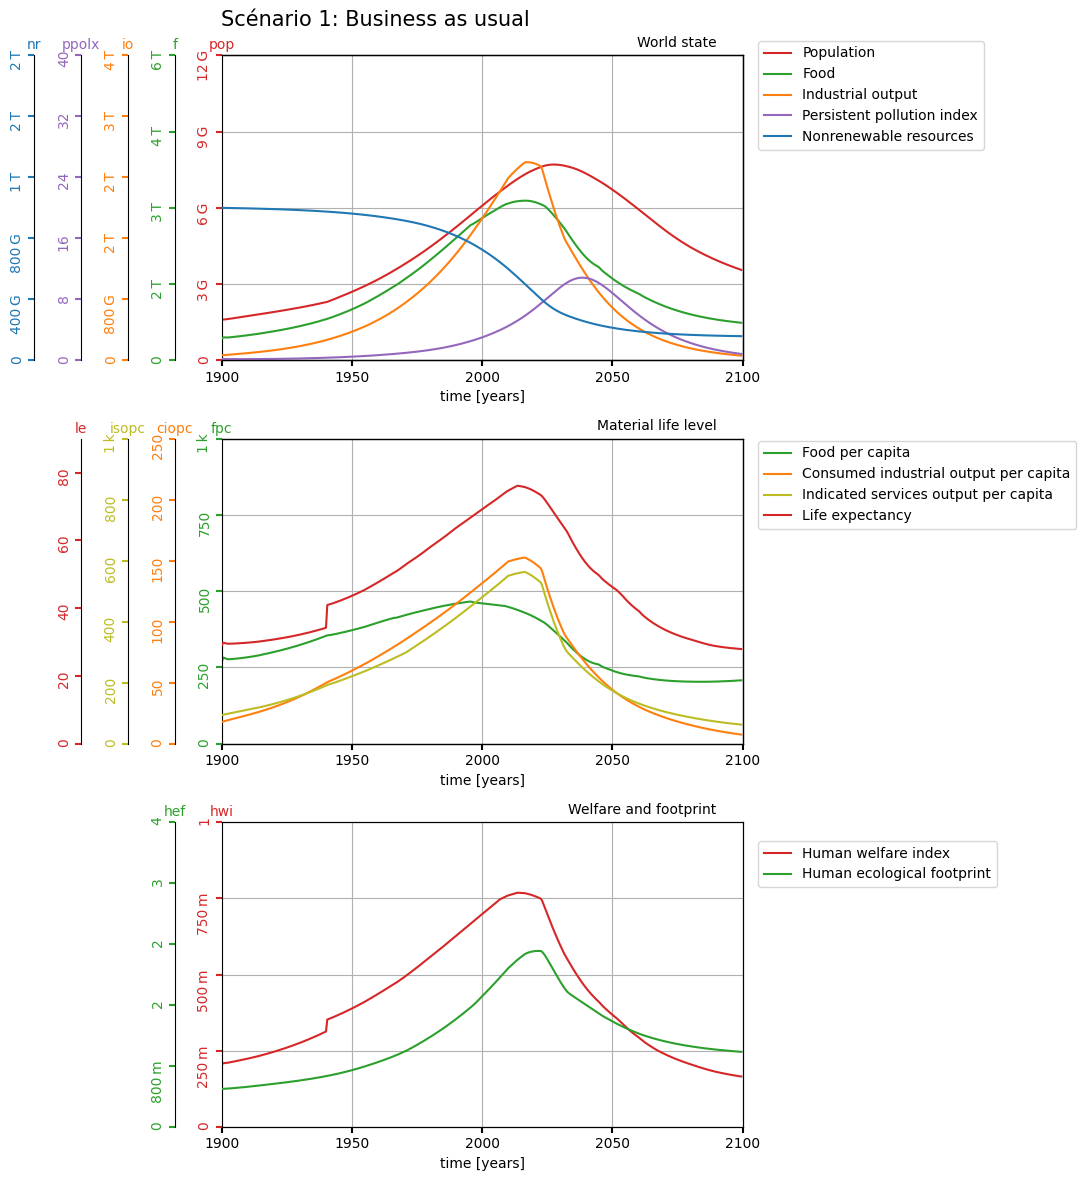

In [5]:
# Case Explication #
# Déclaration d'une instance du premier (=1) scénario du modèle world3
w = World3(1)

# Lancement de la simulation, par défaut de 1900 à 2100 
w.run()

# Affichage de l'évolution principales variables du monde, avec un titre
w.plot_world(title="Scénario 1: Business as usual")

_On voit ici l'évolution, durant la simulation du scénario de base, d'un certain nombre de variables clés, dont on comprendra plus en détail la signification au cours de cette exploration._

***
# Introduction et analyse du premier scénario

- Ce premier scénario, qui suppose que les dynamiques de croissance du monde industriel perdurent essentiellement comme elles l'on fait durant le 20eme siècle, montre un **effondrement**, c'est à dire ici une baisse conjointe de la population  et de la quantité de biens, services et nourriture par personne, autour de 2025. 

Mais attention ! Le modèle est enssentiellement __qualitatif__: il n'a pas la prétention de prévoir et de quantifier précisemment l'avenir du système terre, mais de montrer quels __types de phénomènes__ sont susceptibles de se produire selon certaines hypothèses. 

## _Indications_ _Mieux comprendre une simulation_

Pour mieux comprendre les variables présentées sur les graphiques, plusieurs possibilités:

Le plus facile est de chercher dans la [documentation](https://abaucher.gitlabpages.inria.fr/pydynamo/w3_sectors.html), qui montre la définition, l'équation, les liens avec les autres variables, etc. (voir [en annexe](#7.3.-Lire-la-documentation) comment utiliser la documentation). La barre de recherche est en haut à gauche.

![documentation](https://gitlab.inria.fr/abaucher/pydynamo/-/raw/TPworld3/images_TP/doc.png)

On peut aussi afficher leur définition  avec la commande `definition`:

In [6]:
w.definition('al')

'Arable Land'

_La variable __al__, **a**rable **l**and, représente les terres cutlivables_

On peut aussi afficher l'équation de calcul d'une variable avec `equation`:

In [7]:
w.equation('al')

'al.k = al.j + dt*(ldr.j - ler.j - lrui.j)'

_Pour calculer la valeur actuelle (__al.k__) de la variable __al__, on utilise sa valeur précédente (__al.j__), plus le pas de temps __dt__, multiplié par un terme composé des valeurs précédentes (avec __.j__) de trois autres variables. Celles ci font un bilan du développement des terres (__ldr__, **l**and **d**evelopment **r**ate), de l'érosion (__ler__, **l**and **e**rosion **r**ate) et de l'urbanisation (__lrui__, **l**and **r**emoval from **u**rban and **i**ndustrial use)._
* Plus d'explications à propos des équations en [annexe du notebook](#7.4.-Comment-World3-a-été-conçu-et-implémenté)

Enfin, la commande `plot` permet d'afficher l'évolution de variables en particulier:

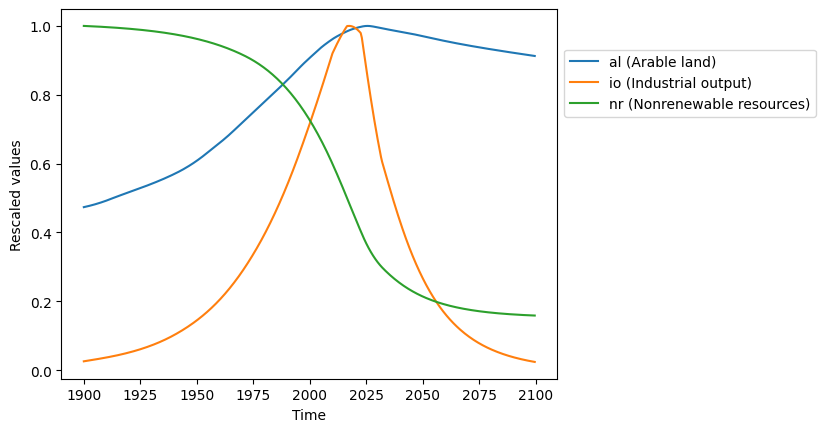

In [8]:
# Affichage des variables al, io et nr, renormalisé (rescale) entre 0 et 1
w.plot(['al', 'io', 'nr'], rescale=True)

_Les terres arables et le produit industriel ont un pic en 2025. Les ressources non renouvelables baissent continuellement_

## Par quoi est causé cet effondrement pour le premier scénario ?

Ce modèle a l'interet de simuler l'interconnectivité des diverses variables qui interviennent dans les differents phénomènes. De ce fait, pour comprendre cet effondrement, il peut être pertinent de regarder plus en détails les facteurs des variables observées pour comprendre la tendance des courbes.  
Ici, on pourra  
> Afficher l'équation du produit industriel ***io*** avec la fonction `equation`. De quelles variables a-t-on besoin pour le calculer ?

> Afficher les courbes de ces variables avec `plot`. Quelle variable a un comportement particulier, et pourrait être à l'origine de la baisse de ***io*** ? 

> Exliqueriez vous ce qui cause un effondrement ?  
> Quelle est la variable déterminante ici ?  
> Pourquoi cette variable à ce comportement?

In [9]:
## CASE REPONSE ##

var2_1 = "Votre Reponse ..?" # Attention, il faut l'ecrire entre guillemets
var2_2 = "Votre Reponse..?"

In [10]:
### Case de Fonctionnement ###
att2_1 = "ou"
att2_2 = "ligux"
msg2_1 = "Kdgizksktz, ut iutyzgzk at kllutjxksktz otjayzxokr, gizakrrksktz yuirk kyyktzokr g tuzxk sujk jk bok."
msg2_2 = "CZuaz g lgoz, rk lgoz wa'atk vgxz jk vray kt vray osvuxzgtzk jky xkyyuaxiky lotgtiogoxky yuoz otbkyzok jgty r'kdzxgizout jk xkyyuaxik lgoz kdvruykx rky iuazy kz xkjaoz rg vxujaizout."

slt2_1 = "Ik wao igayk ikz kllutjxksktz kyz rg inazk xgjoigrk jk rg bgxoghrk 'ou', otjayzxogr uazvaz, wao kyz kyyktzokr jgty tuzxk sujk jk bok."
slt2_2 = "R'kllutjxksktz jk r'otjayzxogr uazvaz ykshrk iuxxkrk g r'kdvruyout jk 'ligux', lxgizout ul otjayzxogr igvozgr grruigzkj zu uhzgototm xkyuaxiky, Sgoy vuaxwauo ?"

button_2 = widgets.Button(description="Verifier ses interprétation")
button_2.style.button_color = '#0d6efd'
button_2.style.text_color='white'
button_2.layout.width = '500px'

soluce_button_2 = widgets.Button(description = "Explications")
soluce_button_2.style.button_color = '#ffc107'
soluce_button_2.style.text_color='white'
soluce_button_2.layout.width = '500px'

output_button_2 = widgets.Output()
output_soluce_2 = widgets.Output()

button_2.on_click(lambda b: on_button_clicked_param(b, output_button_2, button_2, msg2_1, var2_1, att2_1, msg2_2, var2_2, att2_2))
soluce_button_2.on_click(lambda b: on_button_clicked_param_soluce(b, output_soluce_2, soluce_button_2, slt2_1, slt2_2))

output_button_2.layout.display = 'none'
output_soluce_2.layout.display = 'none'


display(button_2)
display(soluce_button_2)
display(output_button_2)
display(output_soluce_2)


Button(description='Verifier ses interprétation', layout=Layout(width='500px'), style=ButtonStyle(button_color…

Button(description='Explications', layout=Layout(width='500px'), style=ButtonStyle(button_color='#ffc107', tex…

Output(layout=Layout(display='none'))

Output(layout=Layout(display='none'))

In [11]:
## CASE REPONSE ##
var3 = "Votre Reponse..?"

In [12]:
### Case de Fonctionnement ###
att3 = "tx"
msg3 = "Kllkizobksktz rg xgxklgizout jky xkyyuaxiky tgzaxkrrky xktj rkax kdzxgizout jk vray kt vray iuazkayk ik wao lgoz mxosvkx rky iuazy jk vxujaizout."
slt3 = "Ou kyz igriark iussk at vxujaoz jk vrayokaxy bgxoghrky. Ut xksgxwak gruxy wak ligux , rg lxgizout jk igvozgr azoroyk vuax uhzktox jky xkyuaxiky (lxgizout ul otjayzxogr igvozgr grruigzkj zu uhzgototm xkyuaxiky), kdvruyk g vgxzox jk 2020, kz wak ikrg taoz ga vxujaoz otjayzxokr zuzgr jgty r'kwagzout. Ux rg xgxklgizout jky xkyyuaxiky luxiky g jkvktykx zuapuaxy vray j'ktkxmok vuax rky kdzxgoxk."

button_3 = widgets.Button(description="Afficher le contenu")
button_3.style.button_color = '#0d6efd'
button_3.style.text_color='white'
button_3.layout.width = '500px'

soluce_button_3 = widgets.Button(description = "Explications")
soluce_button_3.style.button_color = '#ffc107'
soluce_button_3.style.text_color='white'
soluce_button_3.layout.width = '500px'

output_3 = widgets.Output()
soluce_output_3 = widgets.Output()

button_3.on_click(lambda b: on_button_clicked_param(b, output_3, button_3, msg3, var3, att3))
soluce_button_3.on_click(lambda b: on_button_clicked_param_soluce(b, soluce_output_3, soluce_button_3, slt3))

output_3.layout.display = 'none'
soluce_output_3.layout.display = 'none'

display(button_3)
display(output_3)
display(soluce_button_3)
display(soluce_output_3)

Button(description='Afficher le contenu', layout=Layout(width='500px'), style=ButtonStyle(button_color='#0d6ef…

Output(layout=Layout(display='none'))

Button(description='Explications', layout=Layout(width='500px'), style=ButtonStyle(button_color='#ffc107', tex…

Output(layout=Layout(display='none'))

***

> ### Les variables à l'origine de l'effondrement de io

industrial output
io.k = ic.k*(1-fcaor.k)*cuf.k/icor.k


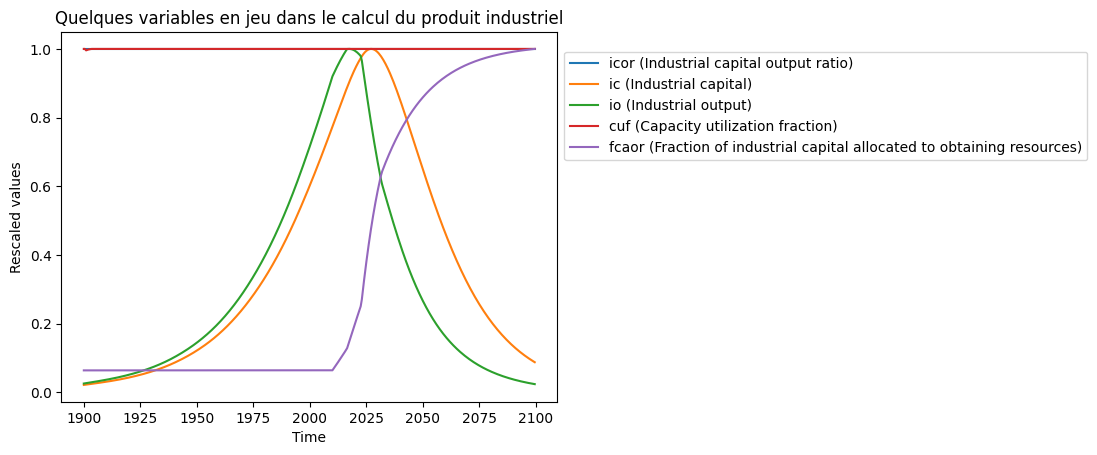

In [13]:
# Case Explications #
# Afficher la définition et l'équation de 'io'
print(w.definition('io'))
print(w.equation('io')) 
# Affichage des variables désirées, normalisé (rescale) entre 0 et 1, avec un titre
w.plot({'io', 'ic', 'fcaor', 'cuf', 'icor'}, rescale=True, title="Quelques variables en jeu dans le calcul du produit industriel") 

**io** est calculé comme un produit de plusieurs variables. On  remarque alors que ***fcaor*** , la fraction de capital utilisé pour obtenir des resources (**f**raction of industrial **c**apital **a**llocated to **o**btaining **r**esources), explose à partir de 2020, et que cela nuit au produit industriel total dans l'équation. Mais pourquoi ?

***

## _Indications_: Les fonctions non-linéaires

Dans le modèle World3, certaines variables sont des fonctions non linéaires d'autres variables. Elles sont repérables dans une équation par leur nom ***NLF_*** (Non Linear Function (ça s'appelle [tabhl](https://abaucher.gitlabpages.inria.fr/pydynamo/tabhl.html) dans la doc)). On peut afficher la courbe d'une équation non linéaire d'une variable avec la fonction `plot_non_linearity`. Par exemple:

jph.k = NLF_jpht(aiph.k)


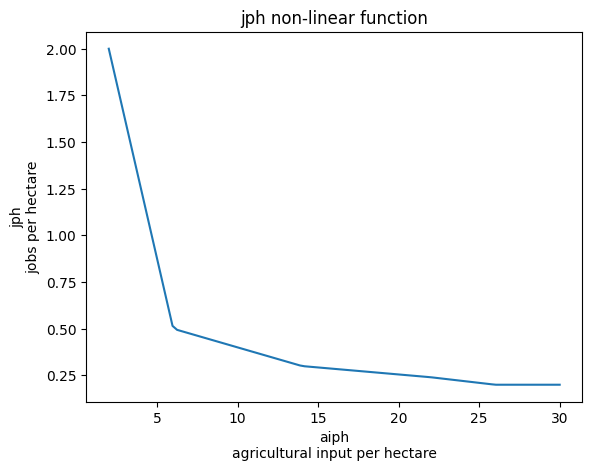

In [14]:
print(w.equation('jph'))
w.plot_non_linearity('jph')

_La variable ___jph___, les métiers par hectare, (**j**obs **p**er **h**ectare) est calculé comme une fonction non linéaire de la variable ***aiph***, la quantité d'intrants agricoles par hectare. Ici, cette relation indique que les emplois agricoles décroissent très vite lorsqu'on augmente les intrants, mais qu'ils convergent ensuite vers 0.2._

Chacune de ces fonctions non linéaires est fixée à l'aide d'un tableau de valeurs. Cette table a le même nom que la variable avec un "**t**" à la fin. Par exemple:

In [15]:
print(w.definition('jpht'))
print(w.jpht)

jobs per hectare table
[2.   0.5  0.4  0.3  0.27 0.24 0.2  0.2 ]


_On retrouve les valeurs du graphique précédent avec la table ***jpht***_

## La non linéarité à l'origine de l'effondrement du scénario 1

> En affichant la fonction non linéaire de **fcaor** (**f**raction of industrial **c**apital **a**llocated to **o**btaining **r**esources), une des variables influençant l'output inustriel **io** et à l'aide de ce graphique et de celui de la question précédente, comment pouvons nous analyser les causes de l'effondrement de l'industrie dans le premier scénario ?

Précision supplémentaire:
- Souvent, dans le modèle World3, les variables changent d'équation ou de valeur à partir d'une certaine date. Quand c'est le cas, on a alors le nom de la variable suivi d'un "1" ou "2" pour signifier avant ou après la date en question. Par exemple, ***fcaor*** passe de ***fcaor1*** à ***fcaor2*** à  partir de l'an 4000 dans le premier scénario (c'est à dire jamais), et la non linéarité affichée par défaut est celle de la première période, ***fcaor1***. Plus de précisions avec la fonction [clip](https://abaucher.gitlabpages.inria.fr/pydynamo/clip.html)

In [16]:
## CASE REPONSE ##
# Votre code...

***

> ### Affichage et interprétation de fcaor

fcaor.k = clip(fcaor2.k, fcaor1.k, time.k, fcaortm)
fcaor1.k = NLF_fcaor1t(nrfr.k)
fraction of resources remaining


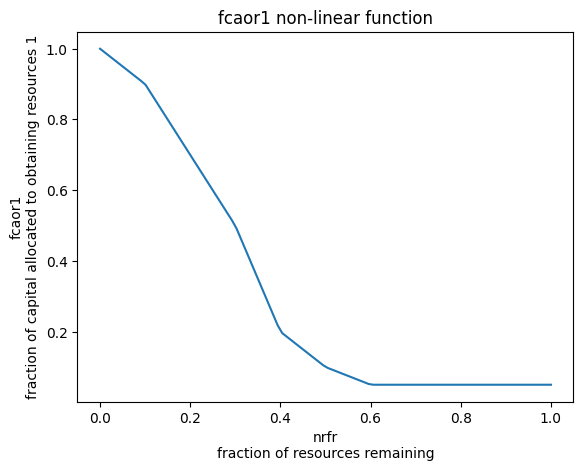

In [17]:
# Case Explication #
print(w.equation('fcaor'))
print(w.equation('fcaor1'))
print(w.definition('nrfr'))
w.plot_non_linearity('fcaor')

En observant l'équation de la variable ***fcaor1***, on peut voir qu'elle est calculée en fonction de ***nrfr***, le ratio des resources non renouvelables disponibles (**n**on **r**enewable **r**esources **f**raction **r**emaining). Sur le graphique, on observe que: 

- quand ***nrfr*** est faible, cela signifie que les resources non renouvelables sont rares, et donc plus coûteuses à extraire. Elles peuvent en effet être plus loin, plus profond, moins dense (comme le pétrole de schiste ou le cuivre), ce qui signifie qu'une énergie beaucoup plus grande va être nécessaire pour l'obtenir, comme on peut le voir dans le grapique ci dessous. Le capital à investir pour obtenir ces resources, ***fcaor*** va donc avoir tendance à prendre toute la place des investissements.


| Il faut beaucoup creuser pour extraire du cuivre dans certaines mines ! |
|:--:|
| ![boule de cuivre](https://gitlab.inria.fr/abaucher/pydynamo/-/raw/TPworld3/images_TP/boule_cuivre.jpeg) |


<!---
- source:
    - http://dillonmarsh.com/copper.html
-->

| Quantité d'énergie nécessaire à l'extraction de quelques minérais, en fonction de leur densité |
|:--:| 
| ![energyMetal](https://gitlab.inria.fr/abaucher/pydynamo/-/raw/TPworld3/images_TP/energy_metal_production.png) |


<!---
- source: 
    - ORE GRADE, METAL PRODUCTION, AND ENERGY
    - NORMAN J PAGE and S. C. CREASEY, Menlo Park, Calif.
    - Journal of Research of the U. S. Geological Survey, 1975, volume 3, issue 1 
    - https://pubs.usgs.gov/journal/1975/vol3issue1/report.pdf
-->

Comme vu sur le premier graphique, la quantité de resource non renouvelables décroit très vite. À un certain seuil, cela provoque une explosion du coût d'extraction des resources, et donc une forte baisse de la produciton industrielle. C'est à travers ce mécanisme que l'effondrement est provoqué dans ce premier scénario.

***

# Oh ! Encore des ressources !

- Si c'est le manque de resources qui pose problème dans le premier scénario, on pourrait, avec pas mal d'optimisme (ou d'aveuglement), imaginer des solutions qui éviteraient l'effondrement sans pour autant remettre en question le mode de développement et de production actuel. Que se passerait-il s'il restait 2 fois plus de resources que prévu ? 

| Cette mine de charbon est si jolie, ce serait vraiment super si on pouvait en ouvrir une deuxième ... |
|:--:|
| ![mine de charbon en Allemagne](https://gitlab.inria.fr/abaucher/pydynamo/-/raw/TPworld3/images_TP/lutzi.jpeg) |


<!---
- source:
    - https://newsrnd.com/life/2022-10-04-decision-on-l%C3%BCtzerath--sacrificed-for-a-promise.Byd6jA0Kzi.html
-->

## _Indications_: Obtenir et changer des paramètres

On récupère et modifie les paramètres d'une instance système en accédant directement à ses attributs (_Note Python: en python, les attributs d'un objet sont des variables attachées à l'objet, auxquelles on accède en écrivant `nom_objet.nom_attribut`_). Pour lancer une simulation avec d'autres options, il suffit de changer la valeur d'un paramètre, puis de lancer le modèle avec `run`. Par exemple, si je décide de fixer le gachîs de nourritures ***pl*** (**p**rocessing **l**oss) à 0:

In [18]:
# Case Explications #
w_pas_de_gachis = World3(1)
print(w_pas_de_gachis.pl)
w_pas_de_gachis.pl = 0
w_pas_de_gachis.run()

0.1


_Par défaut, le gachîs de nourriture est fixé à 0.1 (10%) dans le modèle. Le fixer à 0 ne semble pas faire bugger le modèle. On observera les effets de ce paramétrage après l'exercice suivant._

Il est aussi possible d'accéder la valeur d'une variable à une certaine date avec des crochets. Par exemple, pour obtenir le nombre d'habitants ***pop*** en 2050:

In [19]:
# Case Explications #
w['pop', 2050]

6717037382.062237

_D'après le scénario 1, nous serons 6.7 milliards sur terre en 2050, soit beaucoup moins que [ce que prédit l'ONU](https://www.un.org/fr/un75/shifting-demographics) ..._

## Doubler les resources

> Récupérer une autre instance du modèle `World3`, appelée par exemple _wr2_: `wr2 = World3(1)`

> Récupérer la valeur de la quantité de ressources initiales **nri** (**n**on **r**enewable **i*initial).

> Doubler la valeur de ***nri*** de la nouvelle instance, puis relancer la simulation.

> Afficher le résultat avec `plot_world`. Que se passe-t-il par rapport au scénario 1?

In [20]:
## CASE REPONSE ##
wr2 = World3(scenario_number=1)
#votre Code...

In [21]:
### Case de Fonctionnement ###
wr2.run()
seuil4 = [2000000000000.0]
msg4 = "Hokt Puak, buay gbkf kllkizobksktz xkayyo g gamsktzkx rky xkyyuaxiky vrgtkzgoxky vgx at lgizkax " + str(wr2.nri / 1000000000000.0)
msgErr4 = encrypt("C'est excellent que vous fassiez des essais, mais pour le moment, on ne constate pas de baisse semblable à -2% en 2050")
valeur_a_verif4 = [wr2.nri]
mode4 = 3

slt4 = "Vuax sarzovrokx rky xkyyuaxiky vrgtkzgoxk vgx at lgizkax r or lgaz kixoxk : <hx>cx2 = Cuxrj3(yiktgxou_tashkx=1)<hx>cx2.txo = r*cx2.txo<hx>cx2.xat()<hx>"

output_4 = widgets.Output()
output_soluce_4 = widgets.Output()

button_4 = widgets.Button(description="Vérifier")
button_4.style.button_color = '#198754'
button_4.style.text_color='white'
button_4.layout.width = '500px'
button_4.on_click(lambda b: verif_value_button (b, output_4, button_4, mode4, valeur_a_verif4, seuil4, msg4, msgErr4))

soluce_button_4 = widgets.Button(description="Explications")
soluce_button_4.style.button_color = '#ffc107'
soluce_button_4.style.text_color='white'
soluce_button_4.layout.width = '500px'
soluce_button_4.on_click(lambda b: on_button_clicked_param_soluce(b, output_soluce_4, soluce_button_4, slt4))

output_4.layout.display = 'none'
output_soluce_4.layout.display = 'none'

display(button_4)
display(output_4)
display(soluce_button_4)
display(output_soluce_4)

Button(description='Vérifier', layout=Layout(width='500px'), style=ButtonStyle(button_color='#198754', text_co…

Output(layout=Layout(display='none'))

Button(description='Explications', layout=Layout(width='500px'), style=ButtonStyle(button_color='#ffc107', tex…

Output(layout=Layout(display='none'))

In [22]:
## CASE REPONSE ##
#Votre code ...

In [23]:
### Case de Fonctionnement ###
correctif5 = """\ncx2 = Cuxrj3(yiktgxou_tashkx=1)\nvxotz(cx2.txo)\ncx2.txo = 2 * cx2.txo\ncx2.xat()\nvrz.lomaxk()\ncx2.vruz_cuxrj(zozrk=\"Yiktgxou gbki 2 luoy vray jk xkyyuaxiky otozogrky\")\nvrz.ynuc() \nvxotz(\"Ig g vkaz-kzxk xkzgxjk r\'kllutjxksktz jk wakrwaky gttkky, sgoy ikrao-io kyz ktiuxk vray bourktz ... ykxgoz-ik g igayk jk rg vurrazout, wao ykshrk hkgaiuav vray krkbkk wak rk yiktgxou vxkikjktz ?\")"""

button_5 = widgets.Button(description = "Correctif")
button_5.style.button_color = '#dc3545'
button_5.style.text_color='white'
button_5.layout.width = '500px'
output_5 = widgets.Output()
button_5.on_click(lambda b: execute_correctif(b,output_5,button_5,correctif5))
output_5.layout.display = 'none'

display(button_5)
display(output_5)

Button(description='Correctif', layout=Layout(width='500px'), style=ButtonStyle(button_color='#dc3545', text_c…

Output(layout=Layout(display='none'))

## _Indications_: Analyse d'influence et comparaison de simulations

Il est possible d'afficher un diagramme des variables avec la commande `show_influence_graph`. Par défaut, toutes les variables seront affichées, mais on peut spécifier des variables sur lesquelles se focaliser avec l'argument `variables`, et aussi combien de couches de voisinages on affiche, avec l'argument `depth`. 

Survoler les variables avec souris affiche leur nom et définition.

In [24]:
w.show_influence_graph(variables=['pal', 'al'], depth = 1).show('exemple.html')

exemple.html



On choisit ici de n'afficher que les voisins directs (`depth=1`) des variables ***al*** et ***j***. Le graphique est stocké dans un fichier appelé `exemple.html`.

_On peut voir que les terres cultivables ***al*** (en vert au milieu) sont influencées par la vitesse d'érosion des terres **ler**, la vitesse de développement des terres **ldr** et l'artificialisation des terres **lrui**, et influence moult autres variables._

On peut aussi regarder dans les partie **Out nodes** et **In nodes** de la [documentation de la variable pal](https://abaucher.gitlabpages.inria.fr/pydynamo/w3_variables/pal.html#out-nodes) 

Avec la fonction `plot_compare`, on peut comparer les résultats de deux simulations sur un même graphique. Par exemple, si je veux comparer le scénario standard `w` au scénario `pas_de_gachis`:

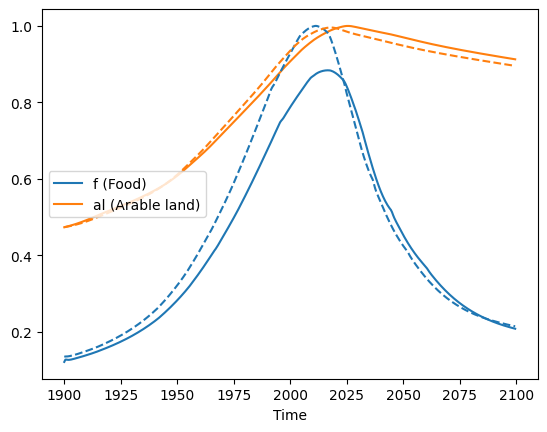

In [25]:
# Comparaison des systèmes w et w_pas_bcp_de_terres sur les variables f et al
w.plot_compare(w_pas_de_gachis, {'f', 'al'}, rescale=True)

_La production de nourriture est d'abord un petit peu plus élevée dans le scénario "pas de gachîs" (en pointillé) mais retombe encore plus rapidement. Pourquoi ? Voir l'explication [en bonus](#8.1.-Le-scenario-pas-de-gachîs)_

On peut aussi comparer deux simulations sur le graphique des principales variables avec la fonction `plot_world_compare` !

## Effets de la pollution

Jusqu'à présent, nous avons pu observer que le manque de ressources n'est pas en soit ce qui cause un effondrement, mais bien plus la question de la pollution persistente (***ppolx***). Il est donc temps de comprendre les facteurs affectés par cette dernière. 
On distingue 4 facteurs affectés. Suarez vous retrouver ce qui cause cet effondrement, classez les par ordre d'importance dans l'impact sur l'effondrement ?  
*Indication : Regarder le graph d'influence peut-être un bon début*

In [26]:
## CASE REPONSE ##
#votre Code...

In [27]:
## CASE REPONSE ##
#votre Code...
# Attention il n'y a pas forcement 4 variables determinantes
var6_1 = ""
var6_2 = ""
var6_3 = ""
var6_4 = ""

In [28]:
### Case de Fonctionnement ###
liste_reponses_6 = [var6_1,var6_2,var6_3,var6_4]
liste_verifiee_6 = ['rsv', 'rljx', 'gnrs', 'vvzis']
liste_verifiee_6_alt = ['rljx', 'rsv', 'gnrs', 'vvzis']

indice_6 = "I'kyz kt kllkz atk ingotk igaygrk kdoyzgtzk jgty rk sujlrk, ktzxk rk vxujaoz otjayzxokr kz r'kyvmxgtik jk bok, hokt puam. Buoio atk otjoigzout vuax rg yaozk : Rky ykxboiky jk ygtzm ja sujlrk yutz zxky jkvktjgtzy ja vxujaoz jk ykxboik vgx vkxyuttk (yuvi), atk gamsktzgzout yomtoloigzobk jk iky jkxtokxy otjmvktjgssktz jk r'kburazout ja vxujaoz jk ykxboik vkaz nzxk at jmhaz jk yurazout."

slt6 = decrypt(encrypt("""
plt.figure()
plot2 = w.plot_compare(wr2, w.get_out_nodes('ppolx'), rescale=True, title="Comparaison des scénarios 1 et 2 pour des variables liées à la pollution")
plt.show()
"""))

button_6 = widgets.Button(description="Verification")
button_6.style.button_color = '#0d6efd'
button_6.style.text_color='white'
button_6.layout.width = '500px'

soluce_button_6 = widgets.Button(description="Explications")
soluce_button_6.style.button_color = '#ffc107'
soluce_button_6.style.text_color='white'
soluce_button_6.layout.width = '500px'

output_button_6 = widgets.Output()
output_soluce_6 = widgets.Output()

button_6.on_click(lambda b: verif_list_button (b, output_button_6, button_6,liste_reponses_6,liste_verifiee_6,indice_6,liste_verifiee_6_alt))
soluce_button_6.on_click(lambda b: execute_correctif(b, output_soluce_6, soluce_button_6, slt6))

output_button_6.layout.display = 'none'
output_soluce_6.layout.display = 'none'

display(button_6)
display(soluce_button_6)
display(output_button_6)
display(output_soluce_6)

Button(description='Verification', layout=Layout(width='500px'), style=ButtonStyle(button_color='#0d6efd', tex…

Button(description='Explications', layout=Layout(width='500px'), style=ButtonStyle(button_color='#ffc107', tex…

Output(layout=Layout(display='none'))

Output(layout=Layout(display='none'))

In [29]:
w.show_influence_graph(variables='ppolx').show("exemple.html")

exemple.html


En regardant dans la documentation de [lmp](https://abaucher.gitlabpages.inria.fr/pydynamo/w3_variables/lmp.html) et de [lfdr](https://abaucher.gitlabpages.inria.fr/pydynamo/w3_variables/lmp.html), on peut voir que la pollution influe aussi sur l'espérance de vie ***le*** via ***lmp*** et dégrade la fertilité des terres ***lfert*** via ***lfdr***.


| Les pluies acides peuvent avoir pas mal d'effets néfaste sur les plantes |
|:--:|
| ![pluie acide](https://gitlab.inria.fr/abaucher/pydynamo/-/raw/TPworld3/images_TP/pluie_acide.jpeg) |


| La pollution de l'air, c'est mauvais pour la santé |
|:--:|
| ![boule de cuivre](https://gitlab.inria.fr/abaucher/pydynamo/-/raw/TPworld3/images_TP/london_smog.jpeg) |

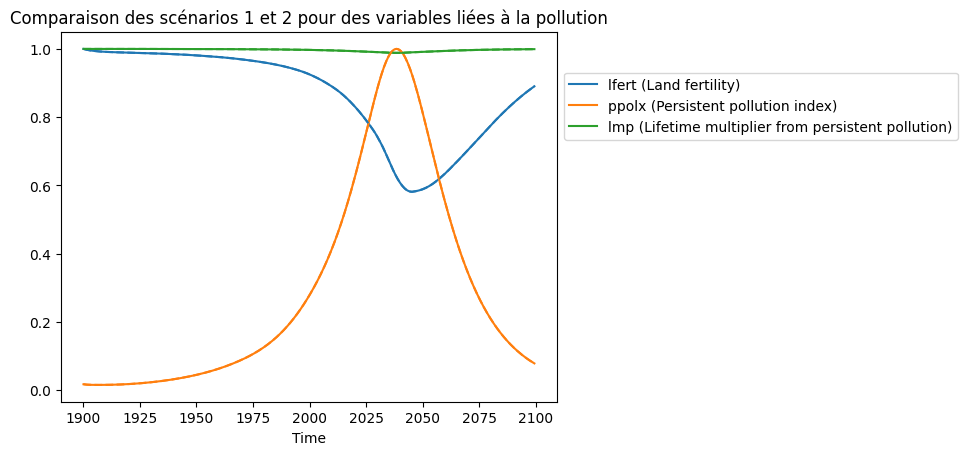

In [30]:
# Comparaison des systèmes w et wr2 sur différentes variables
w.plot_compare(wr2, {'ppolx', 'lmp', 'lfert'}, rescale=True, title="Comparaison des scénarios 1 et 2 pour des variables liées à la pollution")

En effet, on peut voir que la pollution explose dans le scénario avec 2 fois plus de ressources, et que cela réduit fortement la fertilité des terres et l'expérance de vie.
***

***

# À vous de jouer

Dans ce TP, vous essayerez d'inventer et de simuler différents scénarios souhaitables ou réalistes.

| Et si on avait vraiment du pouvoir ? |
|:--:|
| ![conseil des ministres](https://gitlab.inria.fr/abaucher/pydynamo/-/raw/TPworld3/images_TP/conseil_ministres.jpeg) |

<!-- source:
    https://www.leparisien.fr/politique/dans-les-coulisses-d-un-conseil-des-ministres-version-macron-09-08-2017-7183203.php
--->

## _Indications_: Simuler une politique s'appliquant à partir d'une certaine date

Nous serons amenés, pour proposer un scénario, à changer un paramètre ou une équation, mais seulement à partir d'une certaine date d'application d'une politique, pour savoir: que se produirait-il si, à partir de cette date, le monde industrialisé se mettait à appliquer une proposition.

Pour cela, plutôt que de réécrire des équations (si vous voulez quand même, voir comment faire [en annexe](#7.5.-Changer-des-équations)), on peut utiliser la fonction `new_politic`. Celle-ci prend en paramètre la valeur à changer, la date de changement, et la nouvelle valeur à attribuer. 
- Si c'est une constante, comme ***pl*** (**p**rocessing **l**oss), il suffit de donner un nouveau flottant ou entier. 
- Si c'est une table, comme ***ahlmt*** (**a**ssimilation **h**alf **l**ife **m**ultiplier **t**able), il faut fournir une table de la même taille
- Si c'est une variable,  comme ***ppolx*** (**p**ersistent **pol**lution inde**x**), il faut founrir une nouvelle équation 

In [31]:
### Case de Fonctionnement ###
# Une nouvelle instance du modèle assez burlesque
# Par défaut, cette commande prend le scénario 2, le plus 'réaliste' aujourd'hui
w_burlesque = World3()
# À partir de 1985, suite à des ateliers efficaces, on ne gâche plus de nourriture 
w_burlesque.new_politic('pl', 1985, 0)
# À partir de 2052, à cause de la 8G, la terre assimile moins bien la pollution
w_burlesque.new_politic('ahlmt', 2052, w.ahlmt/2)

Dans cette perspective de modifier les équations du modèle, essayons de transformer celle de la pollution persistente en imaginant que par miracle, nous parvenions à la faire baisser de 2% par an à partir de 2012. 

In [32]:
## CASE REPONSE ##
#votre code ...


In [33]:
### Case de Fonctionnement ###
w_burlesque.run()
seuil7_1 = [2.5430404627638206]
seuil7_2 = [w.ppolx[290]]
msg7_1 = "Yavkx, i'kyz kdgizksktz rg josotazout jutz tuay vgxrouty. Bkxolouty yosvrksktz wak tuay t'geuty vgy lgoz vray iusvrowak wak tkikyygoxk kt iusvgxgtz g ikzzk luxsark : c_haxrkywak.tkc_vurozoi('vvurd', 2012, 'vvurd.p - 0.02*vvurd.p*jz')"
msg7_2 = "Boyohrksktz buay gbkf zxuabk iussktz lgoxk jkixuozxk rg vurrazout vkxyoyzgtzk jgty rk sujkrk. Zuazkluoy, tuay inkxinouty atk hgoyyk jk 2%: Ikzzk luxsark kyz ikrrk wao gzzkotz ikz uhpkizol : c_haxrkywak.tkc_vurozoi('vvurd', 2012, 'vvurd.p - 0.02*vvurd.p*jz')"
msgErr7 = encrypt("C'est excellent que vous fassiez des essais, mais pour le moment, on ne constate pas de baisse semblable à -2% en 2050")
valeur_a_verif7 = [w_burlesque.ppolx[290]]
mode7 = 1

slt7 = "Yavkx, i'kyz kdgizksktz rg josotazout jutz tuay vgxrouty. Bkxolouty yosvrksktz wak tuay t'geuty vgy lgoz vray iusvrowak wak tkikyygoxk kt iusvgxgtz g ikzzk luxsark : c_haxrkywak.tkc_vurozoi('vvurd', 2012, 'vvurd.p - 0.02*vvurd.p*jz')"

output_7 = widgets.Output()
output_soluce_7 = widgets.Output()

bouton_7 = widgets.Button(description="Vérifier")
bouton_7.style.button_color = '#198754'
bouton_7.style.text_color='white'
bouton_7.layout.width = '500px'
bouton_7.on_click(lambda b: verif_value_button (b, output_7, bouton_7, mode7, valeur_a_verif7, seuil7_1, msg7_1,msgErr7, msg7_2, seuil7_2))

soluce_button_7 = widgets.Button(description="Explications")
soluce_button_7.style.button_color = '#ffc107'
soluce_button_7.style.text_color='white'
soluce_button_7.layout.width = '500px'
soluce_button_7.on_click(lambda b: on_button_clicked_param_soluce(b, output_soluce_7, soluce_button_7, slt7))

output_7.layout.display = 'none'
output_soluce_7.layout.display = 'none'

display(bouton_7)
display(output_7)

display(soluce_button_7)
display(output_soluce_7)
decrypt("""
\nc_haxrkywak = Cuxrj3()\nc_haxrkywak.tkc_vurozoi(\'vr\', 1985, 0)\nc_haxrkywak.tkc_vurozoi(\'gnrsz\', 2052, c_haxrkywak.gnrsz/2)\nc_haxrkywak.tkc_vurozoi(\'vvurd\', 2012, \'vvurd.p - 0.02*vvurd.p*jz\')\nc_haxrkywak.xat()\n\nvrz.lomaxk(lomyofk=(10, 5))\nc_haxrkywak.vruz([\'vr\', \'gnrs\', \'vvurd\'], xkyigrk=Zxak)\nvrz.zozrk("Ik wao yk vgyyk gbki atk xmjaizout jk rg vurrazout vkxyoyzktzk jk 2% vgx gt d vgxzox jk 2012")\nvrz.ynuc()""")


Button(description='Vérifier', layout=Layout(width='500px'), style=ButtonStyle(button_color='#198754', text_co…

Output(layout=Layout(display='none'))

Button(description='Explications', layout=Layout(width='500px'), style=ButtonStyle(button_color='#ffc107', tex…

Output(layout=Layout(display='none'))

'\n\nw_burlesque = World3()\nw_burlesque.new_politic(\'pl\', 1985, 0)\nw_burlesque.new_politic(\'ahlmt\', 2052, w_burlesque.ahlmt/2)\nw_burlesque.new_politic(\'ppolx\', 2012, \'ppolx.j - 0.02*ppolx.j*dt\')\nw_burlesque.run()\n\nplt.figure(figsize=(10, 5))\nw_burlesque.plot([\'pl\', \'ahlm\', \'ppolx\'], rescale=True)\nplt.title("Ce qui se passe avec une rgduction de la pollution persistente de 2% par an x partir de 2012")\nplt.show()'

In [34]:
### Case de Fonctionnement ###
correctif_8 = decrypt("""
\nc_haxrkywak = Cuxrj3()\nc_haxrkywak.tkc_vurozoi(\'vr\', 1985, 0)\nc_haxrkywak.tkc_vurozoi(\'gnrsz\', 2052, c_haxrkywak.gnrsz/2)\nc_haxrkywak.tkc_vurozoi(\'vvurd\', 2012, \'vvurd.p - 0.02*vvurd.p*jz\')\nc_haxrkywak.xat()\n\nvrz.lomaxk(lomyofk=(10, 5))\nc_haxrkywak.vruz([\'vr\', \'gnrs\', \'vvurd\'], xkyigrk=Zxak)\nvrz.zozrk("Ik wao yk vgyyk gbki atk xmjaizout jk rg vurrazout vkxyoyzktzk jk 2% vgx gt d vgxzox jk 2012")\nvrz.ynuc()""")


actuel_graph_8 = decrypt("""
\nvrz.lomaxk(lomyofk=(10, 5))\nc_haxrkywak.vruz([\'vr\', \'gnrs\', \'vvurd\'], xkyigrk=Zxak)\nvrz.zozrk("Ik wak buzxk iutlomaxgzout vxujaoz")\nvrz.ynuc()
""")

output_correctif_8 = widgets.Output()
output_actuel_graph_8 = widgets.Output()



actuel_graph_bouton_8 = widgets.Button(description = "Votre Proposition")
actuel_graph_bouton_8.style.button_color = '#0dcaf0'
actuel_graph_bouton_8.style.text_color='white'
actuel_graph_bouton_8.layout.width = '500px'
actuel_graph_bouton_8.on_click(lambda b: execute_correctif(b,output_actuel_graph_8,actuel_graph_bouton_8,actuel_graph_8))

correctif_button_8 = widgets.Button(description="Correctif")
correctif_button_8.style.button_color = '#dc3545'
correctif_button_8.style.text_color='white'
correctif_button_8.layout.width = '500px'
correctif_button_8.on_click(lambda b: execute_correctif(b,output_correctif_8, correctif_button_8, correctif_8))

output_correctif_8.layout.display = 'none'
output_actuel_graph_8.layout.display = 'none'

display(actuel_graph_bouton_8)
display(output_actuel_graph_8)

display(correctif_button_8)
display(output_correctif_8)

Button(description='Votre Proposition', layout=Layout(width='500px'), style=ButtonStyle(button_color='#0dcaf0'…

Output(layout=Layout(display='none'))

Button(description='Correctif', layout=Layout(width='500px'), style=ButtonStyle(button_color='#dc3545', text_c…

Output(layout=Layout(display='none'))

_On voit_
- _le gachis de nourriture ***pl*** changer de valeur en 1985,_
- _l'assimilation de la pollution ***ahlm*** changer brutalement de comportement à partir de 2052 à cause du changement dans la table ***ahlmt***,_ 
- _et enfin l'index de pollution ***ppolx*** baisser avec sa nouvelle équation à partir de 2012._

**Attention !** à ne pas exécuter 2 fois la même nouvelle politique sur une même instance, ça risque de faire du dégat: n'oubliez pas de réinitialiser l'instance avant.

***

# ___Choix d'exploration: Décroissance___

Une décroissance volontaire du produit industriel n'a jamais été envisagée par les auteur.e.s de Limits To Growth. Et si on l'implémentait ? On comprendra un peu mieux comment ont été modélisées les dynamiques de la croissance industrielle, et ce qu'il faudrait changer pour y échapper.

> ### Question Légitime

> Quelle est la variable dont il faudrait revoir l'evolution pour se rapprocher au mieux d'une politique de décroissance ?

In [35]:
## CASE REPONSE ##
var9 = "Votre Reponse ..?" # Attention, il faut l'ecrire entre guillemets
#votre Code..

In [36]:
### Case de Fonctionnement ###
att9 = "ou"
msg9 = "Kdgizksktz, ut iutyzgzk at kllutjxksktz otjayzxokr, gizakrrksktz yuirk kyyktzokr g tuzxk sujk jk bok."

slt9 = "Rg bgxoghrk g sujolokx jgty tuzxk sujkrk kyz ou (rk vxujaoz otjayzxokr), kz vray vxkioyksktz, yg zktjgtik g ixuozxk, j'ua rk zkxsk jkixuoyygtik."

button_9 = widgets.Button(description="Verification")
button_9.style.button_color = '#0d6efd'
button_9.style.text_color='white'
button_9.layout.width = '500px'

soluce_button_9 = widgets.Button(description="Explications")
soluce_button_9.style.button_color = '#ffc107'
soluce_button_9.style.text_color='white'
soluce_button_9.layout.width = '500px'

output_button_9 = widgets.Output()
output_soluce_9 = widgets.Output()

button_9.on_click(lambda b: on_button_clicked_param(b, output_button_9, button_9, msg9, 9, att9))
soluce_button_9.on_click(lambda b: on_button_clicked_param_soluce(b, output_soluce_9, soluce_button_9, slt9))

output_button_9.layout.display = 'none'
output_soluce_9.layout.display = 'none'

display(button_9)
display(soluce_button_9)
display(output_button_9)
display(output_soluce_9)

Button(description='Verification', layout=Layout(width='500px'), style=ButtonStyle(button_color='#0d6efd', tex…

Button(description='Explications', layout=Layout(width='500px'), style=ButtonStyle(button_color='#ffc107', tex…

Output(layout=Layout(display='none'))

Output(layout=Layout(display='none'))

***

> ### Caractéristiques actuelles de la décroissance

On entend régulièrement dire, par le GIEC ou le Shift Project par exemple, qu'il faudrait réduire de $X$ pourcents avec $X\approx 5$ par an notre pollution, ou notre production industrielle, pour arriver à un système soutenable . L'idée est donc d'implementer de nouvelles équations pour le produit industriel ***io*** (**i**ndustrial **o**utput) à partir de 2002, en le faisant décroitre de 5% par an.

| Scénario Négawatt  |
| :--: |
| ![scénario negawatt](https://gitlab.inria.fr/abaucher/pydynamo/-/raw/TPworld3/images_TP/negawatt.png)
|
| [En savoir plus](https://www.negawatt.org/scenario) |
***

In [37]:
## CASE REPONSE ##
# Votre code ...
w_dec = World3()


> ### Faisons de cette istance un modèle en decroissance

> Proposer une nouvelle équation pour le produit industriel. S'aider de la partie [À vous de jouer](#4.-À-vous-de-jouer), pour le changement d'équation de variable, et utiliser la valeur au temps précédent `io.j`. L'équation n'est pas forcément évidente, regarder la solution avant de faire la suite.

> Implémenter cette équation dans une nouvelle politique à partir de 2002, dans une nouvelle instance de World3. Afficher le graphique global avec `plot_world`.

In [38]:
### Case de Fonctionnement ###
w_dec.run()
correctif_10 = """c_jki = Cuxrj3()\nc_jki.tkc_vurozoi(\'ou\', 2002, \'ou.p  - 0.05*jz*ou.p\')\nc_jki.xat()\nvrz.lomaxk(lomyofk=(10, 5))\n\nc_jki.vruz_cuxrj(zozrk="Yimtgxou jk jmixuoyygtik otjayzxokrrk")\n\nvrz.zozrk("Yimtgxou jk jmixuoyygtik otjayzxokrrk")\n\nvrz.ynuc()\nvxotz("D ingwak vgy jk zksvy, ut lgoz jmixuozxk ou jk 5%. Juti vuax igriarkx ou ga zksvy gizakr (ou.q), ut ktrlbk 5% jk yg bgrkax ga zksvy vxmimjktz (ou.p) zuay rky vgy jk zksvy jz : ou.q = ou.p - 0.05*jz*ou.p ")\n"""

actuel_graph_10 = """\nvrz.lomaxk(lomyofk=(10, 5))\n\nc_jki.vruz_cuxrj(zozrk="Yimtgxou jk jmixuoyygtik otjayzxokrrk")\n\nvrz.zozrk("Ik wak buzxk iutlomaxgzout vxujaoz")\n\nvrz.ynuc()\n
"""

output_correctif_10 = widgets.Output()
output_actuel_graph_10 = widgets.Output()

actuel_graph_bouton_10 = widgets.Button(description = "Votre Proposition")
actuel_graph_bouton_10.style.button_color = '#198754'
actuel_graph_bouton_10.style.text_color='white'
actuel_graph_bouton_10.layout.width = '500px'
actuel_graph_bouton_10.on_click(lambda b: execute_correctif(b,output_actuel_graph_10,actuel_graph_bouton_10,actuel_graph_10))

correctif_button_10 = widgets.Button(description="Correctif")
correctif_button_10.style.button_color = '#dc3545'
correctif_button_10.style.text_color='white'
correctif_button_10.layout.width = '500px'
correctif_button_10.on_click(lambda b: execute_correctif(b,output_correctif_10, correctif_button_10, correctif_10))


output_correctif_10.layout.display = 'none'
output_actuel_graph_10.layout.display = 'none'

display(actuel_graph_bouton_10)
display(output_actuel_graph_10)

display(correctif_button_10)
display(output_correctif_10)

Button(description='Votre Proposition', layout=Layout(width='500px'), style=ButtonStyle(button_color='#198754'…

Output(layout=Layout(display='none'))

Button(description='Correctif', layout=Layout(width='500px'), style=ButtonStyle(button_color='#dc3545', text_c…

Output(layout=Layout(display='none'))

Flûte ! On a bien un impact réduit mais on tombe sur un effondrement de la population, de l'espérance de vie, de la nourritre, du "bien-être" ... mais pourquoi ?

***

> Du fait que l'on a fait baissé l'importance de l'industrie, on pourrait regarder son impact sur des variables clés telles que : l'espérance de vie ***le*** (**l**ife **e**xpectancy), le bien être humain **hwi** (**h**uman **w**elfare **i**ndex), la fertilité totale ***tf*** (**t**otal **f**ertility), les morts ***d*** (**d**eath), et en déduire la dépendance que le modèle attribue à l'industrie.

In [39]:
## CASE REPONSE ##
# Votre code ...

***
> ### Interprétation de la décroissance

In [40]:
### Case de Fonctionnement ###
correctif_11 = """vrz.lomaxk(lomyofk=(10, 5))\n\nc_jki.vruz([\'ouvi\', \'vuv\', \'nco\', \'zl\', \'j\', \'rk\'], xkyigrk=Zxak)\n\nvrz.zozrk("Wakrwaky bgxoghrky irmy jgty rk yimtgxou jk rg jmixuoyygtik")\n\nvrz.ynuc()\nvxotz("c_jki.vruz([\'ouvi\', \'vuv\', \'nco\', \'zl\', \'j\', \'rk\'], xkyigrk=Zxak)")\nvxotz("Atk hgoyyk larmaxgtzk jk rg vxujaizout otjayzxokrrk vgx vkxyuttk ktzxgrtk atk inazk jk rg vxujaizout jk tuaxxozaxk gotyo wak ja igvozgr jk ykxboik, e iusvxoy ikad jk ygtzk. \\tIkrg ykshrk igaykx :\\t - Atk gamsktzgzout ja tushxk jk suxzy\\t - Atk xkjaizout jk rg lkxzorozk ...")"""

"""
plt.figure(figsize=(10, 5))

w_dec.plot(['iopc', 'pop', 'hwi', 'tf', 'd', 'le','f'], rescale=True)

plt.title("Quelques variables clés dans le scénario de la décroissance")

plt.show()
print("w_dec.plot(['iopc', 'pop', 'hwi', 'tf', 'd', 'le'], rescale=True)")
"""
output_correctif_11 = widgets.Output()

correctif_button_11 = widgets.Button(description="Affichage Suggere")
correctif_button_11.style.button_color = '#ffc107'
correctif_button_11.style.text_color='white'
correctif_button_11.layout.width = '500px'
correctif_button_11.on_click(lambda b: execute_correctif(b,output_correctif_11, correctif_button_11, correctif_11))
output_correctif_11.layout.display = 'none'

display(correctif_button_11)
display(output_correctif_11)

Button(description='Affichage Suggere', layout=Layout(width='500px'), style=ButtonStyle(button_color='#ffc107'…

Output(layout=Layout(display='none'))

Intuitivement, quels facteurs peut-on regarder qui soit influencée par ***io*** et qui soient déterminantes sur les question de mortalité et de fertilité ?  
Indication : Nous cherchons deux secteurs essentiels qui se sont fortement industrialisé au cours du siècle écoulé. 

In [41]:
## CASE REPONSE ##
var12_1 = "io"
var12_2 = ""
var12_3 = ""

In [42]:
### Case de Fonctionnement ###
liste12 = [var12_1,var12_2,var12_3]
actuel_graph_12 = """\n ol tuz ngygzzx(c_jki,bgx12_1):\n    vxotz("bgx12_1 : " + bgx12_1 + " t\'kyz vgy atk bgxoghrk jk c_jki")\nkrol tuz ngygzzx(c_jki,bgx12_2):\n    vxotz("bgx12_2 : " + bgx12_2 + " t\'kyz vgy atk bgxoghrk jk c_jki")\nkrol tuz ngygzzx(c_jki,bgx12_3):\n    vxotz("bgx12_3 : " + bgx12_3 + " t\'kyz vgy atk bgxoghrk jk c_jki")\nkryk :\n    vrz.lomaxk(lomyofk=(10, 5))\n    c_jki.vruz([bgx12_1,bgx12_2,bgx12_3], xkyigrk=Zxak) \n    vrz.zozrk("Iusvgxgoyut ja vxujaoz otjayzxokr gbki rky xkyyuaxiky grosktzgoxky kz rg igvgiozk jk ykxboiky (ygtzk, kzi)")\n    vrz.ynuc()\n    vxotz("Atk hgoyyk larmaxgtzk jk rg vxujaizout otjayzxokrrk vgx vkxyuttk ktzxgrtk atk inazk jk rg vxujaizout jk tuaxxozaxk gotyo wak ja igvozgr jk ykxboik, e iusvxoy ikad jk ygtzk. \\tIkrg ykshrk igaykx :\\t - Atk gamsktzgzout ja tushxk jk suxzy\\t - Atk xkjaizout jk rg lkxzorozk ...")\n"""
attendu_12 = """vrz.lomaxk(lomyofk=(10, 5))\nc_jki.vruz([bgx12_1,bgx12_2,bgx12_3], xkyigrk=Zxak)\nvrz.zozrk("Iusvgxgoyut ja vxujaoz otjayzxokr gbki rky xkyyuaxiky grosktzgoxky kz rg igvgiozk jk ykxboiky (ygtzk, kzi)")\nvrz.ynuc()\nvxotz("Atk hgoyyk larmaxgtzk jk rg vxujaizout otjayzxokrrk vgx vkxyuttk ktzxgrtk atk inazk jk rg vxujaizout jk tuaxxozaxk gotyo wak ja igvozgr jk ykxboik, e iusvxoy ikad jk ygtzk. \tIkrg ykshrk igaykx :\t - Atk gamsktzgzout ja tushxk jk suxzy\t - Atk xkjaizout jk rg lkxzorozk ...")"""

output_actuel_graph_12 = widgets.Output()
actuel_graph_button_12 = widgets.Button(description="Affichage des variables isolées")
actuel_graph_button_12.style.button_color = '#198754'
actuel_graph_button_12.style.text_color='white'
actuel_graph_button_12.layout.width = '500px'
actuel_graph_button_12.on_click(lambda b: execute_correctif(b,output_actuel_graph_12, actuel_graph_button_12, actuel_graph_12))
output_actuel_graph_12.layout.display = 'none'
display(actuel_graph_button_12)
display(output_actuel_graph_12)

output_attendu_12 = widgets.Output()
attendu_button_12 = widgets.Button(description="Explication")
attendu_button_12.style.button_color = '#ffc107'
attendu_button_12.style.text_color='white'
attendu_button_12.layout.width = '500px'
attendu_button_12.on_click(lambda b: execute_correctif(b,output_attendu_12, attendu_button_12, attendu_12))
output_attendu_12.layout.display = 'none'
display(attendu_button_12)
display(output_attendu_12)

Button(description='Affichage des variables isolées', layout=Layout(width='500px'), style=ButtonStyle(button_c…

Output(layout=Layout(display='none'))

Button(description='Explication', layout=Layout(width='500px'), style=ButtonStyle(button_color='#ffc107', text…

Output(layout=Layout(display='none'))

On a bien une baisse fulgurante de la production industrielle par personne, et cela semble causer 
- une augmentation du nombre de morts et 
- et une réduction de la fertilité ...

#### Pour résumer:
**On a un effondrement de la population causé par une augmentation de la mortalité et une baisse de la fertilité  dus au manque de soin et de nourriture ... qui ont sont dépendants de l'industrie, condition également nécessaire au "bien-être"**
#### D'accord mais ... des alternatives sont possibles non ?! 
On voit ici à quel point le modèle World3 ne représente que les dynamiques d'une civilisation indsutrielle en croissance. Un système de santé autonome ne dépendant pas de la technologie, une agriculture sans intrants agricoles, des normes sociales plus indépendantes du revenu, etc., ne sont pas des solutions que le modèle est en mesure de considérer. Les équations ont été écrites dans un contexte et une vision politique spécifique. Par exemple en considérant que l'industrie est une condition nécessaire à l'école, parce qu'aujourd'hui, les pays les plus industrialisés disposent de plus de services éducatifs. 
- C'est pourquoi il est nécessaire de prendre de la distance avec cette représentation du monde: elle est spécifique à une certaine vision d'une époque précise.

| American way of life  |
| :--: |
| ![affiche](https://gitlab.inria.fr/abaucher/pydynamo/-/raw/TPworld3/images_TP/american.jpeg)

***

*** 

## Conception d'alternatives

L'espérance de vie ***le*** est calculée comme un produit de plusieurs valeurs, l'espérance de vie "normale" ***len*** (**l**ife **e**xpectancy **n**ormal) et des facteurs (**l**ifetime **m**ultiplier) liés à différents domaines (santé, densité, alimentation et pollution de l'air). On voit que dans le graphique suivant, ceux-ci s'effondrent dès qu'on réduit la production industrielle ... 

life expectancy
le.k = len*lmf.k*lmhs.k*lmp.k*lmc.k


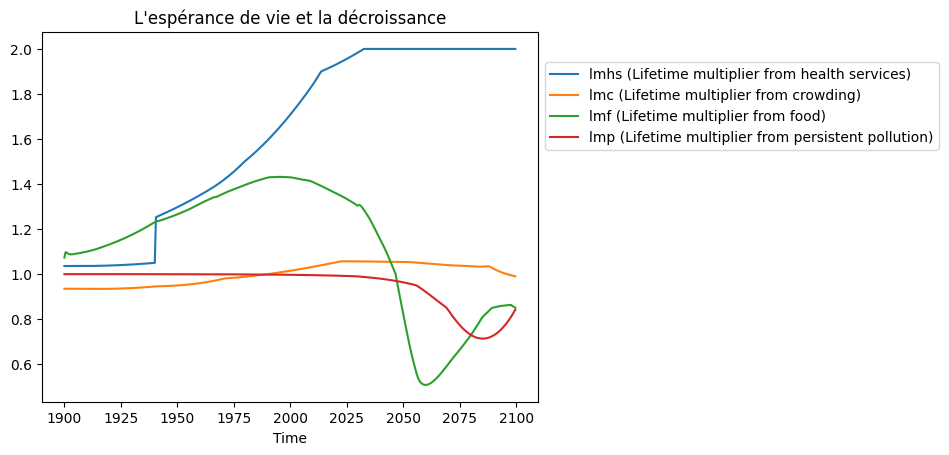

In [43]:
# Case Explications #
print(w_dec.definition('le'))
print(w_dec.equation('le'))
w_dec.plot(['lmhs', 'lmc', 'lmf', 'lmp'], title="L'espérance de vie et la décroissance")

Que faudrait-il changer dans le système pour que ce ne soit plus le cas ? Pour chaque facteur, nous allons essayer de voir comment il est calculé, puis de concevoir une alternative pour éviter de le rendre dépendant de l'industrie. À la fin, nous tenterons de réunir ces alternatives.

***

## Alternatives pour la santé

> ### La chaine de la santé

> En remontant les équations de ***lmhs*** (**l**ifetime **m**ultiplier from **h**ealth **s**ervices), identifiez la chaîne qui lie la santé à la production de services par personne ***sopc***.  Regarder ensuite comment celle-ci est liée à la production industrielle ***io*** (piste: passer par le capital et les investissements). Utiliser [la documentation](https://abaucher.gitlabpages.inria.fr/pydynamo/w3_variables/lmhs.html) ou la commande `show_influence_graph` est bien pratique !

_Précision et rappel: Un multiplier est un facteur entre 0 et 1 (ou un peu plus) qui va multiplier une autre valeur pour l'augmenter ou la réduire. Ici, il représente l'aumgentation ou la baisse d'espérance de vie due aux services de soins suffisants ou non._

Il existe une chaine minimale de 8 variables qui relie le produit industriel et le multiplicateur d'espérance de vie en fonction des services de santé (***lmhs***), saurez vous la retrouver ?
Un bon moyen de verifier et comprendre cet enchainement serait d'afficher le graphique d'ifluence entre ces variables.

In [44]:
## CASE REPONSE ##
var12_1 = "io"
var12_2 = "votre reponse"
var12_3 = "votre reponse"
var12_4 = "votre reponse"
var12_5 = "votre reponse"
var12_6 = "votre reponse"
var12_7 = "votre reponse"
var12_8 = "votre reponse"
var12_9 = "lmhs"

In [45]:
### Case de Fonctionnement ###
liste_reponses12 = [var12_2,var12_3,var12_4,var12_5,var12_6,var12_7,var12_8]
liste_verifiee12 = ['yiox', 'yi', 'yu', 'yuvi', 'nygvi', 'knyvi', 'rsny2']
liste_verifiee12_alt = ['yiox', 'yi', 'yu', 'yuvi', 'nygvi', 'knyvi', 'rsny1']

slt12 = "R'atk jk iky ingotky jk igaygrozk kdoyzgtzk ktzxk ou kz rsny kyz [ ou, yiox, yi, yu, yuvi, nygvi, knyvi, rsny2, rsny ]. Buay jkbxokf xkmgxjkx rg jklotozout jk r'ktykshrk jk iky bgxoghrky glot jk sokad iusvxktjxk ikzzk ingotk"

indice_12 = "I'kyz kt kllkz atk ingotk igaygrk kdoyzgtzk jgty rk sujkrk, ktzxk rk vxujaoz otjayzxokr kz r'kyvkxgtik jk bok, hokt puak.\n Buoio atk otjoigzout vuax rg yaozk : Rky ykxboiky jk ygtzk ( nygvi, knyvi, yuvi ) ja sujkrk yutz zxky jkvktjgtzy ja vxujaoz jk ykxboik vgx vkxyuttk (yuvi), atk gamsktzgzout yomtoloigzobk jk iky jkxtokxy otjkvktjgssktz jk r'kburazout ja vxujaoz jk ykxboik vkaz kzxk at jkhaz jk yurazout."

button_12 = widgets.Button(description="Verification")
button_12.style.button_color = '#0d6efd'
button_12.style.text_color='white'
button_12.layout.width = '500px'

soluce_button_12 = widgets.Button(description="Explications")
soluce_button_12.style.button_color = '#ffc107'
soluce_button_12.style.text_color='white'
soluce_button_12.layout.width = '500px'

output_button_12 = widgets.Output()
output_soluce_12 = widgets.Output()

button_12.on_click(lambda b: verif_list_button (b, output_button_12, button_12,liste_reponses12,liste_verifiee12,indice_12,liste_verifiee12_alt))
soluce_button_12.on_click(lambda b: on_button_clicked_param_soluce(b, output_soluce_12, soluce_button_12, slt12))

output_button_12.layout.display = 'none'
output_soluce_12.layout.display = 'none'

display(button_12)
display(soluce_button_12)
display(output_button_12)
display(output_soluce_12)


Button(description='Verification', layout=Layout(width='500px'), style=ButtonStyle(button_color='#0d6efd', tex…

Button(description='Explications', layout=Layout(width='500px'), style=ButtonStyle(button_color='#ffc107', tex…

Output(layout=Layout(display='none'))

Output(layout=Layout(display='none'))

> ### Graphique d'influences entre les variables précedentes

In [46]:
# Affichage du graphe des influences
w_dec.show_influence_graph(variables=['scir', 'sc', 'so', 'sopc', 'hsapc', 'ehspc', 'lmhs2', 'lmhs'], depth=1).show('sante.html')

sante.html


1. La production industrielle ***io*** détermine l'investissement dans le capital de service ***scir***
2. Qui augmentent ou réduisent le captial de service ***sc***
3. À partir duquel sont calculés les services produits ***so***
4. Dont on déduit les services par personne ***soc***
5. Qui déterminent les services de santé par personne ***hsapc***
6. Qui, avec un peu de retard, deviennent les services de santés effectifs par personne ***ehspc***
7. À partir desquels sont calculés ***lmhs2***, 
8. Puis ***lmhs***

C'est sûr qu'avec des soins complétement dépendants de la production industrielle, on va avoir du mal avec une décroissance de celle-ci ... Et si, à partir de maintenant, une plus grande autonomie dans les pratiques de santé (habitudes alimentaires, remèdes autonomes simples, etc.) permettait à la population de minimiser sa dépendance à la production de services par personne ?


| La dépendance à l'industrie pharmaceutique pour se soigner est-elle nécessaire ?|
| :--: |
| ![medicaments](https://gitlab.inria.fr/abaucher/pydynamo/-/raw/TPworld3/images_TP/medicaments.jpeg)
|
| [En savoir plus](https://www.akklesia.eu/public/pdf_gratuit/_Nemesis_ILLICH.pdf) |

***

> Que pourrait on modifier dans cette chaine pour rendre la santé plus indépendante de l'industrie ? Une variable de cette chaîne en particulier dispose d'une fonction non-linéaire qui rend compte de la dépendance des services de santé à la quantité de services par personne.

In [47]:
## CASE REPONSE ##
# Votre code ...

##########################################################################################################################
#si vous ne parvenez pas a faire l'affichage vous même, vous pouvez juste rentrer le nom de la variable auquel vous pensez
var13 = ""

In [48]:
### Case de Fonctionnement ###
correctif_13 = """vrz.lomaxk(lomyofk=(10, 5))\ngtiokttk_zghrk_nygviz = c_jki.nygviz\ngtiokttk_zghrk_nygviz_tuxsgrofkj = (gtiokttk_zghrk_nygviz - tv.sot(gtiokttk_zghrk_nygviz)) / (tv.sgd(gtiokttk_zghrk_nygviz) - tv.sot(gtiokttk_zghrk_nygviz))\nol ngygzzx(c_jki, bgx13):\n    c_jki_tuxsgrofkj = (mkzgzzx(c_jki, bgx13) - tv.sot(mkzgzzx(c_jki, bgx13))) / (tv.sgd(mkzgzzx(c_jki, bgx13)) - tv.sot(mkzgzzx(c_jki, bgx13)))\n    vrz.vruz(c_jki_tuxsgrofkj, rghkr = "Bgxoghrk ojktzolomk, tuxsgroymk")\nvrz.vruz(gtiokttk_zghrk_nygviz_tuxsgrofkj, rghkr=\'Bgxoghrk Iuttak, tuxsgroymk\')\nvrz.rkmktj(rui=\'ruckx xomnz\')\nvrz.zozrk(\'Iusvgxgoyut ktzxk rg bgxoghrk ojktzolokk kz ikrrk iuttak iussk osvrowamk jgty rg tut otjmvktjgtik jk rg ygtzm lgik ga vxujaoz otjayzxokr\')\nvrz.ynuc()\nol bgx13 == "nygviz" :\n    vxotz("Hokt puak, tuy iutirayouty iutiuxjktz, buoio at tuabkr otjoik vuax rg yaozk : Ikzzk bgxoghrk kyz mkxkk vgx atk zghrk, puakx gbki ikzzk jkxtokxk vuaxxgoz gsktkx jky ingtmksktz yax yut rokt gbki vxujaoz otjayzxokr (ou). Vuax gazgtz ik t\'kyz vgy rk ykar suekt jk xktjxk rg ygtzm vray otjkvktjgtzk, buay vuabkf juti kdvkxosktzkx rohxksktz vuax zxuabkx jky yurazouty ottubgtzky ") \nkryk : \n    vxotz("Or kyz vxuhghrk wak rg bgxoghrk vuotzkk yuoz vkxzotktzk, sgoy krrk tk iuxxkyvutj vgy g ikrrk wak tuay gbouty ojktzolokk. Vuax gazgtz buay vuabkf kyygekx j\'gzzktjxk rky uhpkizoly yammkxky kt buay gvvaegtz yax ikzzk jkxtokxk.")"""
output_correctif_13 = widgets.Output()

correctif_button_13 = widgets.Button(description="Comparaison d'identification")
correctif_button_13.style.button_color = '#ffc107'
correctif_button_13.style.text_color='white'
correctif_button_13.layout.width = '500px'
correctif_button_13.on_click(lambda b: execute_correctif(b,output_correctif_13, correctif_button_13, correctif_13))
output_correctif_13.layout.display = 'none'

display(correctif_button_13)
display(output_correctif_13)

Button(description="Comparaison d'identification", layout=Layout(width='500px'), style=ButtonStyle(button_colo…

Output(layout=Layout(display='none'))

### Monde Alternatif

Crééont notre monde alternatif, en modifiant donc la dépendance de la santé à l'industrie pour et comprendre comment les variables interagissents.
Uns piste possible, comme nous avons vu que les services de santé sont affectés par la table ***hsapct***, serait de trouver une manière de faire croitre efficacement ***lmhs*** (***l***ifetime ***m***ultiplier ***h***ealth ***s***ervices) afin d'avoir si possible un impact sur ***le*** (***l***ife ***e***xpectancy). Pour autant ce n'est pas la seule solution.

Pour cela on commencera par créer une copie de notre monde en décroissance avec **w_dec_sante = w_dec.copy()**

In [49]:
## CASE REPONSE ##
w_dec_sante = w_dec.copy()
#votre Code...

In [50]:
### Case de fonctionnement ###
w_dec_sante.run()
#####################################################################################################################################################
seuil14_1 = w_dec.lmhs[290:399]
msg14_1_1 = "Buay gbkf kt kllkz hokt gamsktzk rk sarzovroigzkax j'kyvmxgtik jk bok jak g rg ygtzk, otjkvktjgssktz ja vxujaoz otjayzxokr, ik wao jkbxgoz kt vxotiovk xktjxk rg ygtzm vray otjkvktjgtzk jk r'otjayzxok"
msgErr14_1 = "Or ykshrkxgoz wak ikzzk iutlomaxgzout tk vgxbokttk vgy g lgoxk gamsktzkx r'kyvkxgtik jk bok. Vkaz-nzxk vuabkf buay buay otzkxkyykx g rg bgxoghrk nygvi."
valeur_a_verif14_1 = w_dec_sante.lmhs[290:399]
mode14_1 = 4

output_14_1 = widgets.Output()
bouton_14_1 = widgets.Button(description="Vérifier l'impact sur le multiplicateur de l'espérance de vie dû aux services de santé")
bouton_14_1.style.button_color = '#198754'
bouton_14_1.style.text_color='white'
bouton_14_1.layout.width = '500px'
bouton_14_1.on_click(lambda b: verif_value_button(b, output_14_1, bouton_14_1, mode14_1, valeur_a_verif14_1, seuil14_1, msg14_1_1, msgErr14_1))
output_14_1.layout.display = 'none'
display(bouton_14_1)
display(output_14_1)

#####################################################################################################################################################
seuil14_2 = w_dec.le[290:399]
msg14_2_1 = "Buzxk iutlomaxgzout lgoz hokt ixuozxk r'kyvmxgtik jk bok vgx xgvvuxz ga sujlrk ykarksktz kt jkixuoyygtik."
msgErr14_2 = encrypt("Il semblerait que cette configuration ne parvienne pas a faire augmenter l'esperance de vie. Peut-être pouvez vous vous interesser a la variable hsapc.")
valeur_a_verif14_2 = w_dec_sante.le[290:399]
mode14_2 = 4

output_14_2 = widgets.Output()
bouton_14_2 = widgets.Button(description="Vérifier l'impact sur l'espérance de vie")
bouton_14_2.style.button_color = '#198754'
bouton_14_2.style.text_color='white'
bouton_14_2.layout.width = '500px'
bouton_14_2.on_click(lambda b: verif_value_button(b, output_14_2, bouton_14_2, mode14_2, valeur_a_verif14_2, seuil14_2, msg14_2_1, msgErr14_2))
output_14_2.layout.display = 'none'
display(bouton_14_2)
display(output_14_2)

###############################################################################################################################################
actuel_graph_14 = """vrz.lomaxk(lomyofk=(10, 5))\nc_jki.vruz_iusvgxk(c_jki_ygtzk, [\'rsny\', \'rk\'], xkyigrk=Zxak, zozrk="R\'kyvmxgtik jk bok gbki atk ygtzm gazutusk ykrut buzxk vxuvuyozout")\nvrz.zozrk("Ik wak buzxk iutlomaxgzout vxujaoz")\nvrz.ynuc()\n"""
output_actuel_graph_14 = widgets.Output()
actuel_graph_bouton_14 = widgets.Button(description = "Votre Proposition")
actuel_graph_bouton_14.style.button_color = '#0dcaf0'
actuel_graph_bouton_14.style.text_color='white'
actuel_graph_bouton_14.layout.width = '500px'
actuel_graph_bouton_14.on_click(lambda b: execute_correctif(b,output_actuel_graph_14,actuel_graph_bouton_14,actuel_graph_14))
output_actuel_graph_14.layout.display = 'none'

#output_actuel_graph_14.layout.display = 'none'

display(actuel_graph_bouton_14)
display(output_actuel_graph_14)

######################################################################################################################################################
correctif_14 = """c_jki_ygtzk = c_jki.iuve()\ntuabkrrk_zghrk_nygviz = [100, 130, 155, 175, 190, 205, 220, 227, 230]\nc_jki_ygtzk.tkc_vurozoi(\'nygviz\', 2024, tuabkrrk_zghrk_nygviz)\nc_jki_ygtzk.xat()\nvrz.lomaxk(lomyofk=(10, 5))\nc_jki.vruz_iusvgxk(c_jki_ygtzk, [\'rsny\', \'rk\'], xkyigrk=Zxak, zozrk="R\'kyvmxgtik jk bok gbki atk ygtzm gazutusk")\nvrz.zozrk("Osvgiz jk rg jmixuoyygtik otjayzxokrrk yax rky ykxboiky jk ygtzm y\'or yutz vray otjmvktjgtzy")\nvrz.ynuc()\nvxotz("Kt lgoz, kt gamsktzgtz rky grruigzouty gad ykxboiky jk ygtzk, otjkvktjgssktz ja vxujaoz otjayzxokr, ut lgoz ixuozxk rky ykxboiky kllkizoly kz juti gbki at yeyzksk vray xkyoyzgtz g atk inazk jk r\'otjayzxok, vuax gazgtz ut iutyzgzk gayyo wak r\'kyvmxgtik jk bok, krrk xksutzk sgoy iutzotak yg jmixuoyygtik vuax gazgtz.")"""
output_soluce_14 = widgets.Output()
soluce_button_14 = widgets.Button(description="Explications")
soluce_button_14.style.button_color = '#dc3545'
soluce_button_14.style.text_color='white'
soluce_button_14.layout.width = '500px'
soluce_button_14.on_click(lambda b : execute_correctif(b,output_soluce_14, soluce_button_14, correctif_14))
output_soluce_14.layout.display = 'none'
display(soluce_button_14)
display(output_soluce_14)

Button(description="Vérifier l'impact sur le multiplicateur de l'espérance de vie dû aux services de santé", l…

Output(layout=Layout(display='none'))

Button(description="Vérifier l'impact sur l'espérance de vie", layout=Layout(width='500px'), style=ButtonStyle…

Output(layout=Layout(display='none'))

Button(description='Votre Proposition', layout=Layout(width='500px'), style=ButtonStyle(button_color='#0dcaf0'…

Output(layout=Layout(display='none'))

Button(description='Explications', layout=Layout(width='500px'), style=ButtonStyle(button_color='#dc3545', tex…

Output(layout=Layout(display='none'))

***

> ### Comprendre les autres parametres de l'espérance de vie
> Nous pouvons constater que l'autonomisation de la santé ne suffit pas à corriger l'effondrement de l'espérance de vie ***le***. Comment pourrions nous expliquer cela ?
> Indication : Nous avions regarder le ***l***ife ***m***ultiplier ***h***ealth ***s***ervices, mais il existe d'autres ***l***ife ***m***ultiplier, comme précedemment il pourrait être informatif de les afficher.

In [51]:
## CASE REPONSE ##
# Votre code ...
var15 = "" #Votre Reponse

On a effectivement beaucoup plus de services de santé, mais l'espérance de vie s'effondre tout de même ... 

In [52]:
### Case de Fonctionnement ###
correctif_15 = """vrz.lomaxk(lomyofk=(10, 5))\nc_jki.vruz_iusvgxk(c_jki_ygtzk, [\'rk\', \'rsny\', \'rsi\', \'rsl\'], xkyigrk=Zxak, zozrk="Gazxky lgizkaxy jk r\'kyvmxgtik jk bok gbki atk ygtzm gazutusk")\nvrz.zozrk("Osvgiz jk rg jmixuoyygtik otjayzxokrrk yax rky ykxboiky jk ygtzm y\'or yutz vray otjmvktjgtzy")\nvrz.ynuc()\n
"""
output_soluce_15 = widgets.Output()
soluce_button_15 = widgets.Button(description="Explications")
soluce_button_15.style.button_color = '#ffc107'
soluce_button_15.style.text_color='white'
soluce_button_15.layout.width = '500px'
soluce_button_15.on_click(lambda b : execute_correctif(b,output_soluce_15, soluce_button_15, correctif_15))
output_soluce_15.layout.display = 'none'
display(soluce_button_15)
display(output_soluce_15)

Button(description='Explications', layout=Layout(width='500px'), style=ButtonStyle(button_color='#ffc107', tex…

Output(layout=Layout(display='none'))

On voit que la nourriture pose toujours sérieusement problème ...

***

***

## Alternatives pour la nourriture

Repassons avec notre modèle ***w_dec***, en laissant pour le moment de côté les modifications que nous avons fait au niveau de la santé.

> ### La chaine de la nourriture

> En remontant les équations du rendement des terres ***ly*** (**l**and **y**ield),  identifier la chaîne qui lie la production de nourriture aux intrants agricoles ***ai*** (**a**gricultural **i**nputs) (piste: passer par le capital), et comment ceux-ci sont liés à la production industrielle ***io***. [La documentation](https://abaucher.gitlabpages.inria.fr/pydynamo/w3_variables/ly.html) est bien pratique !

_Précision et rappel: Un multiplier est un facteur entre 0 et 1 (ou un peu plus) qui va multiplier une autre valeur pour l'augmenter ou la réduire. Dans l'équation de ***ly***, ils représentent l'aumgentation ou la baisse des rendements, due aux différents secteurs (pollution, capital, etc.)_

In [53]:
## CASE REPONSE ##
# Votre code ...
var16_1 = "tai"
var16_2 = "votre reponse"
var16_3 = "votre reponse"
var16_4 = "votre reponse"
var16_5 = "votre reponse"
var16_6 = "ly"

In [54]:
### Case de Fonctionnement ###
liste_reponses16 = [var16_2, var16_3, var16_4, var16_5, var16_6]
liste_verifiee16 = ['igo', 'go', 'govn', 'resi', 're']

slt16 = "Hokt zxuabk, l'atk jky ingotky jk igaygrozk kdoyzgtzk ktzxk ou kz re kyz ['zgo','igo', 'go', 'govn', 'resi', 're']. Buay jkbxokf xkmgxjkx rg jklotozout jk r'ktykshrk jk iky bgxoghrky glot jk sokad iusvxktjxk ikzzk ingotk"

indice_16 = "Vuax rg vxuingotk kzgvk, or ykxgoz pajoiokad jk y'otzkxkyykx ga sarzovroigzkax jay g r'otjayzxok kz gad otbkyzoyyksktz."

button_16 = widgets.Button(description="Verification")
button_16.style.button_color = '#0d6efd'
button_16.style.text_color='white'
button_16.layout.width = '500px'

soluce_button_16 = widgets.Button(description="Explications")
soluce_button_16.style.button_color = '#ffc107'
soluce_button_16.style.text_color='white'
soluce_button_16.layout.width = '500px'

output_button_16 = widgets.Output()
output_soluce_16 = widgets.Output()

button_16.on_click(lambda b: verif_list_button(b, output_button_16, button_16, liste_reponses16, liste_verifiee16, indice_16))
soluce_button_16.on_click(lambda b: on_button_clicked_param_soluce(b, output_soluce_16, soluce_button_16, slt16))

output_button_16.layout.display = 'none'
output_soluce_16.layout.display = 'none'

display(button_16)
display(soluce_button_16)
display(output_button_16)
display(output_soluce_16)

Button(description='Verification', layout=Layout(width='500px'), style=ButtonStyle(button_color='#0d6efd', tex…

Button(description='Explications', layout=Layout(width='500px'), style=ButtonStyle(button_color='#ffc107', tex…

Output(layout=Layout(display='none'))

Output(layout=Layout(display='none'))

> ### Détails des explications

In [55]:
# Case Explication #
# Affichage des équations
for i, variable in enumerate(('tai', 'cai', 'ai', 'aiph', 'lymc', 'ly')):
    print(i + 1, variable, ':', w.definition(variable))
    print('', w.equation(variable)) 

# Affichage du graphe des influences
w_dec.show_influence_graph(variables=['tai', 'cai', 'ai', 'aiph', 'lymc', 'ly'], depth=1).show('sante.html')

1 tai : total agricultural investment
 tai.k = io.k*fioaa.k
2 cai : current agricultural inputs
 cai.k = tai.k * (1 - fiald.k)
3 ai : Agricultural Inputs
 ai.k = smooth(cai.j, alai.k)
4 aiph : agricultural input per hectare
 aiph.k = ai.k*(1 - falm.k)/al.k
5 lymc : land yield multiplier from capital
 lymc.k = NLF_lymct(aiph.k)
6 ly : land yield
 ly.k = lymt.k*lfert.k*lymc.k*lymap.k
sante.html


1. La production industrielle ***io*** détermine l'investissement agricole total ***tai***
2. Qui augmentent ou réduisent les intrants agricoles actuels ***cai***
3. Qui, avec un peu de retard, deviennent les intrants agricoles réels ***ai***
4. À partir desquels sont calculés les intrants par hectare ***aiph***, 
5. Qui déterminent le facteur d'apport du capital pour la production agricole ***lymc*** 
6. D'où est déduite la production agricole


| La production agricole dépend en agriculture conventionnelle des engrais, du pétrole, des pesticides ...|
| :--: |
| ![engrais](https://gitlab.inria.fr/abaucher/pydynamo/-/raw/TPworld3/images_TP/engrais.jpeg)
|
| [En savoir plus](https://www.youtube.com/watch?v=6Dyc_Ubp8E8) |

***

> Que proposer dans cette boucle pour une agriculture moins dépendante de l'industrie ? Une variable en particulier dispose d'une fonction non-linéaire qui rend compte de la dépendance des rendements aux intrants agricoles.

In [56]:
## CASE REPONSE ##
# Votre code ...
var17 = ""

In [57]:
### Case de Fonctionnement ###
correctif_17 = """ol bgx17 == "" : \n    vxotz(" Buay tk xoywakf xokt g kyygekx")\n    bgx17 = " "\nol bgx17[-1] == "z":\n    gtiokttk_zghrk_resi = c_jki.resiz\nkryk : \n    gtiokttk_zghrk_resi = c_jki.resi\n    ol bgx17 != "resi":\n        vxotz("Iussk or y\'gmoz j\'atk bgxoghrk tut rotmgoxk or vuaxxgoz kzxk vkxzotktz jk inkxinkx at zghrk")\nvrz.lomaxk(lomyofk=(10, 5))\ngtiokttk_zghrk_resi_tuxsgrofkj = (gtiokttk_zghrk_resi - tv.sot(gtiokttk_zghrk_resi)) / (tv.sgd(gtiokttk_zghrk_resi) - tv.sot(gtiokttk_zghrk_resi))\nol ngygzzx(c_jki, bgx17):\n    c_jki_tuxsgrofkj = (mkzgzzx(c_jki, bgx17) - tv.sot(mkzgzzx(c_jki, bgx17))) / (tv.sgd(mkzgzzx(c_jki, bgx17)) - tv.sot(mkzgzzx(c_jki, bgx17)))\n    vrz.vruz(c_jki_tuxsgrofkj, rghkr = "Bgxoghrk ojktzolomk, tuxsgroymk : "+ bgx17)\nvrz.vruz(gtiokttk_zghrk_resi_tuxsgrofkj, rghkr=\'Bgxoghrk Iuttak, tuxsgroymk : resi\')\nvrz.rkmktj(rui=\'ruckx xomnz\')\nvrz.zozrk(\'Iusvgxgoyut ktzxk rg bgxoghrk ojktzolokk kz ikrrk iuttak iussk osvrowamk jgty rg tut otjmvktjgtik jk rg ygtzm lgik ga vxujaoz otjayzxokr\')\nvrz.ynuc()\nol bgx17 == "resi" ux bgx17 == "resiz":\n    vxotz("Hokt puak, tuy iutirayouty iutiuxjktz, buoio at tuabkr otjoik vuax rg yaozk : Ikzzk bgxoghrk kyz mkxkk vgx atk zghrk, puakx gbki ikzzk jkxtokxk vuaxxgoz gsktkx jky ingtmksktz yax yut rokt gbki vxujaoz otjayzxokr (ou). Vuax gazgtz ik t\'kyz vgy rk ykar suekt jk xktjxk rg ygtzm vray otjkvktjgtzk, buay vuabkf juti kdvkxosktzkx rohxksktz vuax zxuabkx jky yurazouty ottubgtzky ") \nkryk : \n    vxotz("Or kyz vxuhghrk wak rg bgxoghrk vuotzkk yuoz vkxzotktzk, sgoy krrk tk iuxxkyvutj vgy g ikrrk wak tuay gbouty ojktzolokk. Vuax gazgtz buay vuabkf kyygekx j\'gzzktjxk rky uhpkizoly yammkxky kt buay gvvaegtz yax ikzzk jkxtokxk.")\nvxotz("\\t rg zghrk wak tuay gbouty kt zkzk xkyykshrk g ikrg : ")\nvxotz(c_jki.resiz)"""

correctif_17_2 = """vrz.lomaxk(lomyofk=(10, 5))\nc_jki.vruz_tut_rotkgxoze(\'resi\')\nvrz.zozrk(\'Kburazout jk rg bgxoghrk tut rotkgoxk resi\')\nvxotz("Kt glloingtz rg zghrk ja lgizkax jk xktjksktz ja igvozgr : ")\nvxotz("Zghrk jk rg bgxoghrk resi : ") \nvxotz(c_jki.resiz)\nvrz.ynuc()\nvxotz("Ut y\'gvkxiuoz wak rky xktjksktzy gmxoiurky yutz zxky jmvktjgtzy jky otzxgtzy vgx nkizgxk govn (gmxoiarzaxgr otvazy vkx nkizgxk).")"""

output_correctif_17 = widgets.Output()
correctif_button_17 = widgets.Button(description="Comparaison d'identification variable")
correctif_button_17.style.button_color = '#0d6efd'
correctif_button_17.style.text_color='white'
correctif_button_17.layout.width = '500px'
correctif_button_17.on_click(lambda b: execute_correctif(b,output_correctif_17, correctif_button_17, correctif_17))
correctif_button_17.layout.width = '500px'
output_correctif_17.layout.display = 'none'

output_correctif_17_2 = widgets.Output()
correctif_button_17_2 = widgets.Button(description="Explications")
correctif_button_17_2.style.button_color = '#ffc107'
correctif_button_17_2.style.text_color='white'
correctif_button_17_2.layout.width = '500px'
correctif_button_17_2.on_click(lambda b: execute_correctif(b,output_correctif_17_2, correctif_button_17_2, correctif_17_2))
correctif_button_17_2.layout.width = '500px'
output_correctif_17_2.layout.display = 'none'

display(correctif_button_17)
display(output_correctif_17)
display(correctif_button_17_2)
display(output_correctif_17_2)

Button(description="Comparaison d'identification variable", layout=Layout(width='500px'), style=ButtonStyle(bu…

Output(layout=Layout(display='none'))

Button(description='Explications', layout=Layout(width='500px'), style=ButtonStyle(button_color='#ffc107', tex…

Output(layout=Layout(display='none'))

> ### Retrouver l'indépendance de l'agriculture face à l'industrie
Nous allons creer un nouveau modèle ***w_dec_agro*** afin de tester de nouvelles politiques sur l'agriculture et voir si cela permet d'équilibrer le modèle.  
Comme nous l'avons vu, dans un monde en décroissance, l'industrie s'effondre, il faut donc trouver des solutions pour limiter l'impact de cet effondrement sur les autres secteurs comme celui de l'agriculture. Secteur qui s'avère très dépendant de ses intrants : ***a***gricultural ***i***nput ***p***er ***h***ectare (***aiph***), qui ont un impact sur la variable : ***l***and ***y***ield ***m***ultiplier from ***c***apital (***lymc***).  
L'une des politiques envisageable est l'agro-ecologie, qui désigne un ensemble de concepts et de pratiques dans lesquels les connaissances de l'écologie scientifique sont utilisées pour la production agricole en se passant d'intrant dû à l'industrie. L'une des idées derrière est notamment la permaculture, qui vise a maintenir le niveau de fertilité des sols en faisant cohabiter des espèces compatibles sur un même sol.  
On pourrait resumer cette idée à faire en sorte que le niveau de rendement des sols soit constant.

In [58]:
## CASE REPONSE ##
w_dec_agro = w_dec.copy()
# Votre code ...

In [59]:
### Case de fonctionnement ###
w_dec_agro.run()
#####################################################################################################################################################
seuil18_1 = w_dec.lymc[290:399]
msg18_1_1 = "Lkroiozgzouty, buay gbkf zxuabk rk suekt jk xkjaoxk r'osvgiz ja igvozgr yax rky xktjksktzy jky yury."
msgErr18_1 = "Ikzzk iutlomaxgzout tk ykshrk vgy xkjaoxk r'osvgiz ja igvozgr yax rky xktjksktzy jky yury, zuazkluoy atk voyzk vuyyohrk ykxgoz j'kdvruxkx rg bgxoghrk resi."
valeur_a_verif18_1 = w_dec_agro.lymc[290:399]
mode18_1 = 2

output_18_1 = widgets.Output()
bouton_18_1 = widgets.Button(description="Vérifier l'impact sur le multiplicateur dû aux intrant du rendement des sols")
bouton_18_1.style.button_color = '#198754'
bouton_18_1.style.text_color='white'
bouton_18_1.layout.width = '500px'
bouton_18_1.on_click(lambda b: verif_value_button(b, output_18_1, bouton_18_1, mode18_1, valeur_a_verif18_1, seuil18_1, msg18_1_1, msgErr18_1))
output_18_1.layout.display = 'none'
display(bouton_18_1)
display(output_18_1)

#####################################################################################################################################################
seuil18_2 = w_dec.f[290:399]
msg18_2_1 = "Ikzzk iutlomaxgzout g rk skxozk jk vgxbktox g gamsktzkx rg wagtzozk jk tuaxxozaxk vxujaozk vgx xgvvuxz ga sujkrk jkixuoyygtik jk jkvgxz."
msgErr18_2 = "Sgrnkaxkayksktz ikzzk iutlomaxgzout tk ykshrk vgy vgxbktox g gamsktzkx rky xkyyuaxiky grosktzgoxky. Buay vuaxxokf kdvruxkx rky bgxoghrky wao atoyyktz xktjksktzy jky yury kz vxujaoz otjayzxokr."
valeur_a_verif18_2 = w_dec_agro.f[290:399]
mode18_2 = 4

output_18_2 = widgets.Output()
bouton_18_2 = widgets.Button(description="Vérifier l'impact sur la nourriture")
bouton_18_2.style.button_color = '#198754'
bouton_18_2.style.text_color='white'
bouton_18_2.layout.width = '500px'
bouton_18_2.on_click(lambda b: verif_value_button(b, output_18_2, bouton_18_2, mode18_2, valeur_a_verif18_2, seuil18_2, msg18_2_1, msgErr18_2))
output_18_2.layout.display = 'none'
display(bouton_18_2)
display(output_18_2)

###############################################################################################################################################
actuel_graph_18 = """vrz.lomaxk(lomyofk=(10, 5))\nc_jki.vruz_iusvgxk(c_jki_gmxu, [\'resi\', \'l\'], xkyigrk=Zxak, zozrk="Rky tobkgad jk jmvktjgtik gad otzxgtzy jk r\'gmxoiarzaxk kz jk tuaxxozaxk ykrut buzxk vxuvuyozout")\nvrz.zozrk("Ik wak buzxk iutlomaxgzout vxujaoz")\nvrz.ynuc()\n"""

output_actuel_graph_18 = widgets.Output()
actuel_graph_bouton_18 = widgets.Button(description = "Votre Proposition")
actuel_graph_bouton_18.style.button_color = '#0dcaf0'
actuel_graph_bouton_18.style.text_color='white'
actuel_graph_bouton_18.layout.width = '500px'
actuel_graph_bouton_18.on_click(lambda b: execute_correctif(b,output_actuel_graph_18,actuel_graph_bouton_18,actuel_graph_18))
output_actuel_graph_18.layout.display = 'none'

#output_actuel_graph_18.layout.display = 'none'

display(actuel_graph_bouton_18)
display(output_actuel_graph_18)

######################################################################################################################################################
correctif_18 = """c_jki_gmxu = c_jki.iuve()\nresi_2000 = c_jki[\'resi\', 2000]\ntuabkrrk_zghrk_tuaxxozaxk = [resi_2000 lux _ ot xgtmk(rkt(c_jki.resiz))]\nc_jki_gmxu.tkc_vurozoi(\'resiz\', 2024, tuabkrrk_zghrk_tuaxxozaxk)\nc_jki_gmxu.xat()\n\nvrz.lomaxk(lomyofk=(10, 5))\nc_jki.vruz_iusvgxk(c_jki_gmxu, [\'resi\', \'l\'], xkyigrk=Zxak, zozrk="Rky tobkgad jk jmvktjgtik gad otzxgtzy jk r\'gmxoiarzaxk kz jk tuaxxozaxk ykrut buzxk vxuvuyozout")\nvrz.zozrk("Ik wak vxujaoz atk iutlomaxgzout gbki sgotzoktz jk rg lkxzorozm jky yury")\nvrz.ynuc()\nvxotz("Kt lgoz, kt gamsktzgtz rky grruigzouty gad ykxboiky jk ygtzk, otjkvktjgssktz ja vxujaoz otjayzxokr, ut lgoz ixuozxk rky ykxboiky kllkizoly kz juti gbki at yeyzksk vray xkyoyzgtz g atk inazk jk r\'otjayzxok, vuax gazgtz ut iutyzgzk gayyo wak r\'kyvmxgtik jk bok, krrk tk xksutzk vgy.")\n"""
output_soluce_18 = widgets.Output()
soluce_button_18 = widgets.Button(description="Explications")
soluce_button_18.style.button_color = '#dc3545'
soluce_button_18.style.text_color='white'
soluce_button_18.layout.width = '500px'
soluce_button_18.on_click(lambda b : execute_correctif(b,output_soluce_18, soluce_button_18, correctif_18))
output_soluce_18.layout.display = 'none'
display(soluce_button_18)
display(output_soluce_18)

Button(description="Vérifier l'impact sur le multiplicateur dû aux intrant du rendement des sols", layout=Layo…

Output(layout=Layout(display='none'))

Button(description="Vérifier l'impact sur la nourriture", layout=Layout(width='500px'), style=ButtonStyle(butt…

Output(layout=Layout(display='none'))

Button(description='Votre Proposition', layout=Layout(width='500px'), style=ButtonStyle(button_color='#0dcaf0'…

Output(layout=Layout(display='none'))

Button(description='Explications', layout=Layout(width='500px'), style=ButtonStyle(button_color='#dc3545', tex…

Output(layout=Layout(display='none'))

> ### Comprendre les autres parametres de l'espérance de vie
> Nous pouvons constater que l'indépendantisation industrielle de l'agriculture ne suffit pas à corriger l'effondrement de l'espérance de vie ***le***. Comment pourrions nous expliquer cela ?
> Indication : Nous nous sommes focalisé sur le ***l***ifetime ***m***ultiplier from ***f***, mais il existe d'autres ***l***ife ***m***ultiplier, comme précedemment il pourrait être informatif de les afficher.

In [60]:
## CASE REPONSE ##
# Votre code ...
var19_1 = ""
var19_2 = ""

In [61]:
### Case de Fonctionnement ###
liste_reponses19 = [var19_1, var19_2]
liste_verifiee19 = ['rsny', 'rsi']

button_19 = widgets.Button(description="Verification")
button_19.style.button_color = '#0d6efd'
button_19.style.text_color='white'
button_19.layout.width = '500px'

output_button_19 = widgets.Output()

button_19.on_click(lambda b: verif_list_button(b, output_button_19, button_19, liste_reponses19, liste_verifiee19))

output_button_19.layout.display = 'none'

display(button_19)
display(output_button_19)

correctif_19_2 = """vrz.lomaxk(lomyofk=(10, 5))\nc_jki.vruz_iusvgxk(c_jki_gmxu, [\'rk\', \'rsny\', \'rsi\', \'rsl\'], xkyigrk=Zxak, zozrk="Lgizkaxy jk r\'kyvmxgtik gbki r\'gmxu-miurumok")\n\nvrz.ynuc()\nvxotz("Ik yutz rky ykxboiky jk ygtzk (rsny), kz jgty atk suotjxk skyaxk rg zxuv luxzk jktyozm (rsi), wao xkyzktz gruxy rky vxotiovgrky lxkoty wao rosozktz       r\'kyvmxgtik jk bok.")\n"""
output_soluce_19_2 = widgets.Output()
soluce_button_19_2 = widgets.Button(description="Explications")
soluce_button_19_2.style.button_color = '#ffc107'
soluce_button_19_2.style.text_color='white'
soluce_button_19_2.on_click(lambda b : execute_correctif(b,output_soluce_19_2, soluce_button_19_2, correctif_19_2))
soluce_button_19_2.layout.width = '500px'
output_soluce_19_2.layout.display = 'none'
display(soluce_button_19_2)
display(output_soluce_19_2)

Button(description='Verification', layout=Layout(width='500px'), style=ButtonStyle(button_color='#0d6efd', tex…

Output(layout=Layout(display='none'))

Button(description='Explications', layout=Layout(width='500px'), style=ButtonStyle(button_color='#ffc107', tex…

Output(layout=Layout(display='none'))

***
## Alternatives pour la densité

> ### Quel est le lien entre produit industriel et densité de population 

>  En regardant les connexions de la variable ***l***ifetime ***m***ultiplier from ***c***rowding, saurez vous retrouver son lien avec ***i***ndustrial ***o***utput ***p***er ***c***apita ?

In [62]:
## CASE REPONSE ##
# Votre code ...
var20 = "votre reponse"


In [63]:
### Case de Fonctionnement ###
att20 = encrypt("iso")
msg20 = "Zuaz d lgoz, rg bgxoghrk wao xkrok rsi kz ou kyz hokt iso (ixucjotm sarzovrokx lxus otjayzxe), igx r'otjayzxogroygzout g vkxsoy rk jkbkruvvksktz jk borrk jk vray kt vray mxgtjky kz jktyky"

slt20 = "Yo ut y'otzkxkyyk ga mxgvnowak j'otlraktik ktzxk ou kz rsi, ut vkaz iutyzgzkx wak rg bgxoghrk wao rky xkrok kyz iso (ixucjotm sarzovrokx lxus otjayzxe), igx r'otjayzxogroygzout g vkxsoy jk mxgtjksktz jkbkruvvkx rk sujk jk bok axhgot, vkxskzzgtz tuzgssktz jk rky kzktjxk kz j'giikaorrox atk vrgay mxgtjk jktyozk."

button_20 = widgets.Button(description="Verification")
button_20.style.button_color = '#0d6efd'
button_20.style.text_color='white'
button_20.layout.width = '500px'

soluce_button_20 = widgets.Button(description="Explications")
soluce_button_20.style.button_color = '#ffc107'
soluce_button_20.style.text_color='white'
soluce_button_20.layout.width = '500px'

output_button_20 = widgets.Output()
output_soluce_20 = widgets.Output()

button_20.on_click(lambda b: on_button_clicked_param(b, output_button_20, button_20, msg20, var20, att20))
soluce_button_20.on_click(lambda b: on_button_clicked_param_soluce(b, output_soluce_20, soluce_button_20, slt20))

output_button_20.layout.display = 'none'
output_soluce_20.layout.display = 'none'

display(button_20)
display(soluce_button_20)
display(output_button_20)
display(output_soluce_20)

correctif_20_2 = """vrz.lomaxk(lomyofk = (10,5))\nvxotz(c.kwagzout('rsi'))\nvxotz(c.mkz_ot_tujky('rsi', cozn_jklotozouty=Zxak))\nvxotz(c.kwagzout('iso'))\nc_jki.vruz_tut_rotkgxoze('iso')\nvrz.ynuc()"""
output_soluce_20_2 = widgets.Output()
soluce_button_20_2 = widgets.Button(description="Explications")
soluce_button_20_2.style.button_color = '#dc3545'
soluce_button_20_2.style.text_color='white'
soluce_button_20_2.layout.width = '500px'
soluce_button_20_2.on_click(lambda b : execute_correctif(b,output_soluce_20_2, soluce_button_20_2, correctif_20_2))
output_soluce_20_2.layout.display = 'none'
display(soluce_button_20_2)
display(output_soluce_20_2)

Button(description='Verification', layout=Layout(width='500px'), style=ButtonStyle(button_color='#0d6efd', tex…

Button(description='Explications', layout=Layout(width='500px'), style=ButtonStyle(button_color='#ffc107', tex…

Output(layout=Layout(display='none'))

Output(layout=Layout(display='none'))

Button(description='Explications', layout=Layout(width='500px'), style=ButtonStyle(button_color='#dc3545', tex…

Output(layout=Layout(display='none'))

***

> ### Graph d'influence de ***iopc***

In [64]:
w_dec.show_influence_graph(variables=['iopc','lmc'], depth=1).show('sante.html')

sante.html


La fraction de la population vivant en ville ***fpu*** (**f**raction of **p**opulation **u**rban) et un certain multiplier ***cmi*** (**c**rowding **m**ultiplier from **i**ndustry) causent des dommages à l'espérance de vie. Ce ***cmi*** rend compte de la relation entre produit industriel par personne ***iopc*** (**i**ndustrial **o**utput per **c**apita) et dommages pour l'espérance de vie: Lorsque la population est très pauvre, vivre en ville a un impact très néfaste (on pense ici aux bidonvilles). Avec la dépollution, gestion des eaux, entretien des routes, etc., cet impact réduit, puis ré-augmente finalement lorsque les produits industriels devienent plus élevés (on pense à la concentration de voitures, de zones industrielles polluantes, etc).

***

> ### Et si on les villes ne dépendaient plus de l'industrie ?

> De quelle manière pourrait on changer cette table, si on mettait largement en place des écoquartiers, avec une quantité de nature en ville suffisante pour assurer un cadre de vie urbain sain sans dépendre de l'industrie ? 

In [65]:
## CASE REPONSE ##
# Votre code ...
w_dec_naturb = w_dec.copy()

In [66]:
### Case de fonctionnement ###
w_dec_naturb.run()
#####################################################################################################################################################
seuil21_1 = w_dec.cmi[290:399]
msg21_1_1 = encrypt("Parfait, vous avez reussi a faire diminuer le facteur multiplicateur de densite due a l'industrie par rapport au modele simplement en decroissance.")
msgErr21_1 = encrypt("Il semblerait que les modification effectuees ne sont pas parvenues a faire diminuer le facteur multiplicateur de densite due a l'industrie. Essayer de vous ")
valeur_a_verif21_1 = w_dec_naturb.cmi[290:399]
mode21_1 = 2

output_21_1 = widgets.Output()
bouton_21_1 = widgets.Button(description="Vérifier l'impact sur la densité engendrée par l'industrie")
bouton_21_1.style.button_color = '#198754'
bouton_21_1.style.text_color='white'
bouton_21_1.layout.width = '500px'
bouton_21_1.on_click(lambda b: verif_value_button(b, output_21_1, bouton_21_1, mode21_1, valeur_a_verif21_1, seuil21_1, msg21_1_1, msgErr21_1))
output_21_1.layout.display = 'none'
display(bouton_21_1)
display(output_21_1)

#####################################################################################################################################################
seuil21_2 = w_dec.lmc[290:399]
msg21_2_1 = encrypt("Visiblement vous etes parvenu a faire remonter le multiplicateur d'espérance de vie du a la densite, les villes malgres la diminution de l'industrie parviennent a se stabiliser.")
msgErr21_2 = encrypt("Le multiplicateur d'espérance de vie du a la densite n'a pas augmente dans votre configuration. Vous deviez regarder la variable cmi.")
valeur_a_verif21_2 = w_dec_naturb.lmc[290:399]
mode21_2 = 4

output_21_2 = widgets.Output()
bouton_21_2 = widgets.Button(description="Vérifier l'impact sur l'espérance de vie associé à la densité")
bouton_21_2.style.button_color = '#198754'
bouton_21_2.style.text_color='white'
bouton_21_2.layout.width = '500px'
bouton_21_2.on_click(lambda b: verif_value_button(b, output_21_2, bouton_21_2, mode21_2, valeur_a_verif21_2, seuil21_2, msg21_2_1, msgErr21_2))
output_21_2.layout.display = 'none'
display(bouton_21_2)
display(output_21_2)

###############################################################################################################################################
actuel_graph_21 = """vrz.lomaxk(lomyofk=(10, 5))\nc_jki.vruz_iusvgxk(c_jki_tgzaxh, [\'iso\', \'rsi\'], xkyigrk=Zxak, zozrk="Kburazout ja tobkga jk jktyozm kt lutizout jk r\'otjayzxok kz ja sarzovroigzkax j\'kyvmxgtik jk bok kt lutizout jk rg jktyozm ykrut buzxk vxuvuyozout")\nvrz.zozrk("Kburazout ja tobkga jk jktyozm kt lutizout jk r\'otjayzxok kz ja sarzovroigzkax j\'kyvmxgtik jk bok kt lutizout jk rg jktyozm ykrut buzxk vxuvuyozout")\nvrz.ynuc()\n
"""
output_actuel_graph_21 = widgets.Output()
actuel_graph_bouton_21 = widgets.Button(description = "Votre Proposition")
actuel_graph_bouton_21.style.button_color = '#0dcaf0'
actuel_graph_bouton_21.style.text_color='white'
actuel_graph_bouton_21.layout.width = '500px'
actuel_graph_bouton_21.on_click(lambda b: execute_correctif(b,output_actuel_graph_21,actuel_graph_bouton_21,actuel_graph_21))
output_actuel_graph_21.layout.display = 'none'

display(actuel_graph_bouton_21)
display(output_actuel_graph_21)

######################################################################################################################################################
slt21_1 = encrypt("slt21_1")
correctif_21 = """gtiokttk_zghrk_isoz = c.isoz\ntuabkrrk_zghrk_isoz = [0 lux o ot c.isoz]\nc_jki_tgzaxh = c_jki.iuve()\nc_jki_tgzaxh.tkc_vurozoi(\'isoz\', 2000, tuabkrrk_zghrk_isoz)\nc_jki_tgzaxh.xat()\nvrz.lomaxk(lomyofk=(10, 5))\nc_jki.vruz_iusvgxk(c_jki_tgzaxh, [\'rsi\', \'iso\'], xkyigrk=Zxak, zozrk="Kburazout ja tobkga jk jktyozm kt lutizout jk r\'otjayzxok kz ja sarzovroigzkax j\'kyvmxgtik jk bok kt lutizout jk rg jktyozm gbki atk kburazout jk rg jktyozm tarrk kt lutizout jk r\'otjayzxok")\nvrz.zozrk("Kburazout ja tobkga jk jktyozm kt lutizout jk r\'otjayzxok kz ja sarzovroigzkax j\'kyvmxgtik jk bok kt lutizout jk rg jktyozm gbki atk kburazout jk rg jktyozm tarrk kt lutizout jk r\'otjayzxok")\nvxotz(" Kt gvvrowagtz :\\t  > tuabkrrk_zghrk_isoz = [0 lux o ot c.isoz] \\t  > c_jki_tgzaxh = c_jki.iuve()\\t  > c_jki_tgzaxh.tkc_vurozoi(\'isoz\', 2000, tuabkrrk_zghrk_isoz)\\t  > c_jki_tgzaxh.xat().\\t Ut uhzoktz hokt rk ingtmksktz jk vurozowak kyvmxm.")\nvrz.ynuc()\n"""
output_soluce_21 = widgets.Output()
soluce_button_21 = widgets.Button(description="Explications")
soluce_button_21.style.button_color = '#dc3545'
soluce_button_21.style.text_color='white'
soluce_button_21.layout.width = '500px'
soluce_button_21.on_click(lambda b: execute_correctif(b, output_soluce_21, soluce_button_21, correctif_21))
output_soluce_21.layout.display = 'none'
display(soluce_button_21)
display(output_soluce_21)


Button(description="Vérifier l'impact sur la densité engendrée par l'industrie", layout=Layout(width='500px'),…

Output(layout=Layout(display='none'))

Button(description="Vérifier l'impact sur l'espérance de vie associé à la densité", layout=Layout(width='500px…

Output(layout=Layout(display='none'))

Button(description='Votre Proposition', layout=Layout(width='500px'), style=ButtonStyle(button_color='#0dcaf0'…

Output(layout=Layout(display='none'))

Button(description='Explications', layout=Layout(width='500px'), style=ButtonStyle(button_color='#dc3545', tex…

Output(layout=Layout(display='none'))

> ### Exemple d'isntallation urbaine non industrielle

| Exemple: la phytodépuration, purification des eaux usées avec un filtre planté |
| :--: |
| ![Phytodépuration, source https://jardinage.lemonde.fr/dossier-1101-phytoepuration.html](https://gitlab.inria.fr/abaucher/pydynamo/-/raw/TPworld3/images_TP/phytodepuration.jpg) |
| Voir [plus de détails](https://www.ecologs.org/eau/les-traitements-naturels-la-phytoepuration-de-l-eau.html) |
***

>### Impact sur l'espérance de vie
Relancer la simulation, et comparer l'évolution de l'espérance de vie le, ainsi que les 3 facteurs lmhs, lmf et lmc par rapport à la première décroissance. A-t-on réussi ? Quelles sont les principales limites ?

In [67]:
## CASE REPONSE ##
#votre code
var22_1 = ""
var22_2 = ""


In [68]:
### Case de Fonctionnement ###
liste_reponses22 = [var22_1, var22_2]
liste_verifiee22 = ['rsny', 'rsl']
liste_verifiee22_alt = ['rsl','rsny']

indice_22 = "Vuax rg yaozk, atk huttk voyzk ykxgoz jk y'gvvaekx yax rky huazuty xuamk kz jk xkvkxkx rky romtky jk iujky wao ingtmktz vuax iusvxktjxk iussktz gvvrowakx jk tuabkrrky vurozowaky."

button_22 = widgets.Button(description="Verification")
button_22.style.button_color = '#0d6efd'
button_22.style.text_color='white'
button_22.layout.width = '500px'

output_button_22 = widgets.Output()

button_22.on_click(lambda b: verif_list_button(b, output_button_22, button_22, liste_reponses22, liste_verifiee22, indice_22,liste_verifiee22_alt))

output_button_22.layout.display = 'none'

display(button_22)
display(output_button_22)

correctif_22_2 = """vrz.lomaxk(lomyofk=(10, 5))\nc_jki.vruz_iusvgxk(c_jki_tgzaxh, [\'rk\', \'rsny\', \'rsi\', \'rsl\'], xkyigrk=Zxak, zozrk="R\'kyvmxgtik jk bok gbki atk tgzaxk axhgotk")\nvrz.ynuc()\nvxotz (" Yax ik mxgvnowak ut vkaz buox wak rky lgizkaxy rosozgtzy yutz jk tuabkga rky ykxboiky jk ygtzmy (rsny) gotyo wak rg tuaxxozaxk (rsl). Ux ikio kyz rumowak iussk ik yutz rky jkad vgxgslzxky jmpd ojktzolomy iussk rosozgtz kz wak tuay tk rky gbuty vgy ingtmmy oio.")"""
output_soluce_22_2 = widgets.Output()
soluce_button_22_2 = widgets.Button(description="Explications")
soluce_button_22_2.style.button_color = '#ffc107'
soluce_button_22_2.style.text_color='white'
soluce_button_22_2.on_click(lambda b : execute_correctif(b, output_soluce_22_2, soluce_button_22_2, correctif_22_2))
soluce_button_22_2.layout.width = '500px'
output_soluce_22_2.layout.display = 'none'
display(soluce_button_22_2)
display(output_soluce_22_2)


Button(description='Verification', layout=Layout(width='500px'), style=ButtonStyle(button_color='#0d6efd', tex…

Output(layout=Layout(display='none'))

Button(description='Explications', layout=Layout(width='500px'), style=ButtonStyle(button_color='#ffc107', tex…

Output(layout=Layout(display='none'))

On n'a en effet aucun impact néfaste provenant de la densité urbaine, mais cela n'empêche pas l'espérance de vie de s'effondrer à cause des deux autres facteurs qui n'ont pas changé.

***

## Une première réunion des alternatives

> Réunissons au sein d'un même scénario les trois propositions précédentes.
Il est possible de se focaliser sur seulement certaines variables pour déterminer si oui ou non nous avons trouver une alternative satisfaisante.
Si vous n'avez pas d'idées, il suffit de laisser vide, a vous de deviner les variables qui ont été choisies par défaut.

In [69]:
## CASE REPONSE ##
var24_1 = "variable d'obesevation 1"
var24_2 = "variable d'observation 2"

In [70]:
## CASE REPONSE ##
# Votre code ...
w_dec_reu_1 = w_dec.copy()


In [71]:
### Case de fonctionnement ###
w_dec_reu_1.run()
#####################################################################################################################################################
seuil23_1 = w_dec.hwi[300:399]
if hasattr(w_dec,var24_1):
   seuil23_1 = getattr(w_dec, var24_1)[300:399]
else:
     var24_1 = "human wellfare index"

msg23_1_1 = encrypt("Rg bgxoghrk : " + encrypt(var24_1) + " g hokt gamsktzkk vgx xgvvuxz ga sujkrk yosvrksktz kt jkixuoyygtik")
msgErr23_1 = "Rg bgxoghrk: " + encrypt(var24_1) + " t'g vgy gamsktzkk. Tuay vuaxxouty tuay otzkxkyykx g jky bgxoghrky wao vkxskzzktz atk kbgragzout zxky mruhgrk zkrrky wak rk, nco, ua ktiuxk nkl"
valeur_a_verif23_1 = w_dec_reu_1.hwi[300:399]
mode23_1 = 4

output_23_1 = widgets.Output()
bouton_23_1 = widgets.Button(description="Vérifier l'impact sur " + var24_1)
bouton_23_1.style.button_color = '#198754'
bouton_23_1.style.text_color='white'
bouton_23_1.layout.width = '500px'
bouton_23_1.on_click(lambda b: verif_value_button(b, output_23_1, bouton_23_1, mode23_1, valeur_a_verif23_1, seuil23_1, msg23_1_1, msgErr23_1))
output_23_1.layout.display = 'none'
display(bouton_23_1)
display(output_23_1)

#####################################################################################################################################################
seuil23_2 = w_dec.le[300:399]
if hasattr(w_dec,var24_2):
   seuil23_2 = getattr(w_dec, var24_2)[300:399]
else:
     var24_2 = "life expectancy"

msg23_2_1 = encrypt("Rg bgxoghrk : " + encrypt(var24_2) + " g hokt gamsktzkk vgx xgvvuxz ga sujkrk yosvrksktz kt jkixuoyygtik")
msgErr23_2 = "Rg bgxoghrk: " + encrypt(var24_2) + " t'g vgy gamsktzkk. Tuay vuaxxouty tuay otzkxkyykx g jky bgxoghrky wao vkxskzzktz atk kbgragzout zxky mruhgrk zkrrky wak rk, nco, ua ktiuxk nkl"
valeur_a_verif23_2 = w_dec_reu_1.le[300:399]
mode23_2 = 4

output_23_2 = widgets.Output()
bouton_23_2 = widgets.Button(description="Vérifier l'impact sur " + var24_2)
bouton_23_2.style.button_color = '#198754'
bouton_23_2.style.text_color='white'
bouton_23_2.layout.width = '500px'
bouton_23_2.on_click(lambda b: verif_value_button(b, output_23_2, bouton_23_2, mode23_2, valeur_a_verif23_2, seuil23_2, msg23_2_1, msgErr23_2))
output_23_2.layout.display = 'none'
display(bouton_23_2)
display(output_23_2)

###############################################################################################################################################
actuel_graph_23 = """vrz.lomaxk(lomyofk=(10, 5))\nc_jki_xka_1.vruz_cuxrj(zozrk="Vxksolxk xmatout jky grzkxtgzobky vuax rg jmixuoyygtik ykrut buzxk vxuvuyozout")\nvrz.zozrk("Vxksolxk xmatout jky grzkxtgzobky vuax rg jmixuoyygtik ykrut buzxk vxuvuyozout")\nvrz.ynuc()\n"""
output_actuel_graph_23 = widgets.Output()
actuel_graph_bouton_23 = widgets.Button(description = "Votre Proposition")
actuel_graph_bouton_23.style.button_color = '#0dcaf0'
actuel_graph_bouton_23.style.text_color='white'
actuel_graph_bouton_23.layout.width = '500px'
actuel_graph_bouton_23.on_click(lambda b: execute_correctif(b,output_actuel_graph_23,actuel_graph_bouton_23,actuel_graph_23))
output_actuel_graph_23.layout.display = 'none'

display(actuel_graph_bouton_23)
display(output_actuel_graph_23)

######################################################################################################################################################
slt23_1 = encrypt("slt23_1")
correctif_23 = """c_jki_xka_1 = c_jki.iuve()\nc_jki_xka_1.tkc_vurozoi(\'nygviz\', 2002, [100, 130, 150, 165, 180, 210, 220, 235, 230])\nc_jki_xka_1.tkc_vurozoi(\'resiz\', 2002, [c_jki.mkz_gz(\'resi\', 2000) lux _ ot xgtmk(rkt(c_jki.resiz))])\nc_jki_xka_1.tkc_vurozoi(\'isoz\', 2000, c_jki.isoz*0 )\nc_jki_xka_1.xat()\nvrz.lomaxk(lomyofk=(10, 5))\nc_jki_xka_1.vruz_cuxrj(zozrk="Vxksolxk xmatout jky grzkxtgzobky vuax rg jmixuoyygtik")\nvrz.lomaxk(lomyofk = (10,5))\nc_jki.vruz_iusvgxk(c_jki_xka_1, [\'rk\', \'nco\'], xkyigrk=Zxak, zozrk="R\'kyvmxgtik jk bok kz rk tobkga jk bok nasgot")\nvrz.ynuc()\nvxotz("Ut buay vxuvuyk jk xkmgxjkx rky bgxoghrk rk (rolk kdvktizgtie) kz nco (nasgt ckrrlgxk otjkd) wao vgxgoyyktz xkbkrgzxoik ja hut lutizouttksktz j\'atk yuiokzk. Gotyo kt kdkiazgtz :\\t > c_jki_xka_1 = c_jki.iuve()\\t> c_jki_xka_1.tkc_vurozoi(\'nygviz\', 2002, [100, 130, 150, 165, 180, 210, 220, 235, 230])\\t> c_jki_xka_1.tkc_vurozoi(\'resiz\', 2002, [c_jki.mkz_gz(\'resi\', 2000) lux _ ot xgtmk(rkt(c_jki.resiz))])\\t> c_jki_xka_1.tkc_vurozoi(\'isoz\', 2000, c_jki.isoz*0 )\\t> c_jki_xka_1.xat()\\t")\n"""
output_soluce_23 = widgets.Output()
soluce_button_23 = widgets.Button(description="Explications")
soluce_button_23.style.button_color = '#dc3545'
soluce_button_23.style.text_color='white'
soluce_button_23.layout.width = '500px'
soluce_button_23.on_click(lambda b: execute_correctif(b, output_soluce_23, soluce_button_23, correctif_23))
output_soluce_23.layout.display = 'none'
display(soluce_button_23)
display(output_soluce_23)


Button(description="Vérifier l'impact sur human wellfare index", layout=Layout(width='500px'), style=ButtonSty…

Output(layout=Layout(display='none'))

Button(description="Vérifier l'impact sur life expectancy", layout=Layout(width='500px'), style=ButtonStyle(bu…

Output(layout=Layout(display='none'))

Button(description='Votre Proposition', layout=Layout(width='500px'), style=ButtonStyle(button_color='#0dcaf0'…

Output(layout=Layout(display='none'))

Button(description='Explications', layout=Layout(width='500px'), style=ButtonStyle(button_color='#dc3545', tex…

Output(layout=Layout(display='none'))

 On peut voir le l'espérance de vie et le niveau de bien-être s'effondre tout de même. Que se passe-t-il ? Que faudrait-il améliorer ?

In [72]:
## CASE REPONSE ##
#votre code ...
var25 = ""

In [73]:
### Case de Fonctionnement ###
att25 = "l"
msg25 = "I'kyz atk uhykxbgzout iuxxkizk, sgrmxk tuy iuxxkizouty, rg tuaxxozaxk iutzotak jk josotakx, i'kyz kt lgoz ja g r'kxuyout jky yury"
slt25 = "Ykrut rky mxgvnoiy io-jkyyay, sgrmxk tuy iuxxkizouty, rg tuaxxozaxk iutzotak jk josotakx, i'kyz kt lgoz ja g r'kxuyout jky yury."

button_25 = widgets.Button(description="Verification")
button_25.style.button_color = '#0d6efd'
button_25.style.text_color='white'
button_25.layout.width = '500px'

soluce_button_25 = widgets.Button(description="Explications")
soluce_button_25.style.button_color = '#ffc107'
soluce_button_25.style.text_color='white'
soluce_button_25.layout.width = '500px'

output_button_25 = widgets.Output()
output_soluce_25 = widgets.Output()

button_25.on_click(lambda b: on_button_clicked_param(b, output_button_25, button_25, msg25, var25, att25))
soluce_button_25.on_click(lambda b: on_button_clicked_param_soluce(b, output_soluce_25, soluce_button_25, slt25))

output_button_25.layout.display = 'none'
output_soluce_25.layout.display = 'none'

display(button_25)
display(soluce_button_25)
display(output_button_25)
display(output_soluce_25)

Button(description='Verification', layout=Layout(width='500px'), style=ButtonStyle(button_color='#0d6efd', tex…

Button(description='Explications', layout=Layout(width='500px'), style=ButtonStyle(button_color='#ffc107', tex…

Output(layout=Layout(display='none'))

Output(layout=Layout(display='none'))

***

## Stagnation de la population

Si c'est un problème de place disponible, on peut se dire qu'une stabilisation de la population pourrait être une bonne idée. Le modèle World3 intègre déjà les mécanismes correspondant à cette politique, à travers l'usage de 2 constantes en particulier. À partir de la date ***zpgt*** (**z**ero **p**opulation **g**rowth **t**ime), le nombre d'enfants désiré par famille est fixé à 2. À partir de la date ***fcest*** (**f**ertility **c**ontrol **e**ffectiveness **t**ime), les familles ont le plein moyen de contrôler leur fertilité. Ces constantes sont par défaut fixées à 4000, c'est à dire en dehors de la simulation.

> Nous utiliserons une nouvelle instance `w_dec_stagn` qui reprend le travail déjà effectué, c'est a dire qui est une copy de `w_dec_reu1` avec la fonction `copy`. Fixer les dates ***z***ero ***p***opulation ***g***rowth ***t***ime (***zpgt***) et ***f***ertility ***c***ontrol ***e***ffectiveness ***t***ime (***fcest***) à 2024 pour lancer la simulation peut être un bon point de départ.

> Comparer l'évolution de  l'espérance de vie ***le***, ainsi que les 3 facteurs ***lmhs***, ***lmf*** et ***lmc***, avec le premier scénario de réunion des alternatives. Est-ce suffisant ? Que se pase-t-il ?

In [74]:
## CASE REPONSE ##
#votre code...
w_dec_stagn = w_dec_reu_1.copy()

In [75]:
### Case de fonctionnement ###
w_dec_stagn.run()
#####################################################################################################################################################
seuil26_1 = w_dec_reu_1.lmf[300:399]

msg26_1_1 = "Ktiuxk atk sgtovargzout lxaizakayk, buay kzky hokt vgxbkta g lgoxk ixuozxk rk sarzovroigzkax j'kyvkxgtik jk bok ja g rg tuaxxozaxk"
msgErr26_1 = "Rk sarzovroigzkax j'kyvkxgtik jk bok ja g rg tuaxxozaxk t'g boyohrksktz vgy ixa... Tuay buarouty iussktikx vgx yzghoroykx rg vuvargzout, vuax ikrg or kyz vuyyohrk jk sujolokx fvmz kz likyz."
valeur_a_verif26_1 = w_dec_stagn.lmf[300:399]
mode26_1 = 4

output_26_1 = widgets.Output()
bouton_26_1 = widgets.Button(description="Vérifier l'impact sur le multiplicateur d'esperance de vie du a la nourriture")
bouton_26_1.style.button_color = '#198754'
bouton_26_1.style.text_color='white'
bouton_26_1.layout.width = '500px'
bouton_26_1.on_click(lambda b: verif_value_button(b, output_26_1, bouton_26_1, mode26_1, valeur_a_verif26_1, seuil26_1, msg26_1_1, msgErr26_1, msg26_1_2))
output_26_1.layout.display = 'none'
display(bouton_26_1)
display(output_26_1)

#####################################################################################################################################################
seuil26_2 = w_dec_reu_1.fpc[300:399]

msg26_2_1 = 'Buay gbkf hkr kz hokt zxuabm atk sgtokxk jk sarzovrokx rg wagtzozm jk tuaxxozaxk vgx vkxyuttk.'
msgErr26_2 = "Rg wagtzozk jk tuaxxozaxk vgx vkxyttk t'g boyohrksktz vgy ixa... Tuay buarouty iussktikx vgx yzghoroykx rg vuvargzout, vuax ikrg or kyz vuyyohrk jk sujolokx fvmz kz likyz."
valeur_a_verif26_2 = w_dec_stagn.fpc[300:399]
mode26_2 = 4

output_26_2 = widgets.Output()
bouton_26_2 = widgets.Button(description="Vérifier l'impact sur la quantite de nourriture par personne")
bouton_26_2.style.button_color = '#198754'
bouton_26_2.style.text_color='white'
bouton_26_2.layout.width = '500px'
bouton_26_2.on_click(lambda b: verif_value_button(b, output_26_2, bouton_26_2, mode26_2, valeur_a_verif26_2, seuil26_2, msg26_2_1, msgErr26_2, msg26_2_2))
output_26_2.layout.display = 'none'
display(bouton_26_2)
display(output_26_2)

###############################################################################################################################################
actuel_graph_26 = """rz.lomaxk(lomyofk=(10, 5))\nc_jki_xka_1.vruz_iusvgxk(c_jki_yzgmt, [\'rsny\', \'rsi\', \'rsl\', \'lvi\'], xkyigrk=Zxak, zozrk="Jmixuoyygtik, gzrkxtgzobky 1 kz yzgmtgzout ykrut buzxk vxuvuyozout")\nvrz.zozrk("Jmixuoyygtik, gzrkxtgzobky 1 kz yzgmtgzout ykrut buzxk vxuvuyozout")\nvrz.ynuc()\n"""
output_actuel_graph_26 = widgets.Output()
actuel_graph_bouton_26 = widgets.Button(description="Votre Proposition")
actuel_graph_bouton_26.style.button_color = '#0dcaf0'
actuel_graph_bouton_26.style.text_color='white'
actuel_graph_bouton_26.layout.width = '500px'
actuel_graph_bouton_26.on_click(lambda b: execute_correctif(b, output_actuel_graph_26, actuel_graph_bouton_26, actuel_graph_26))
output_actuel_graph_26.layout.display = 'none'

display(actuel_graph_bouton_26)
display(output_actuel_graph_26)

######################################################################################################################################################
slt26_1 = encrypt("slt26_1")
correctif_26 = """c_jki_yzgmt = c_jki_xka_1.iuve()\nc_jki_yzgmt.fvmz = 2024\nc_jki_yzgmt.likyz = 2024\nc_jki_yzgmt.xat()\nvrz.lomaxk(lomyofk=(10, 5))\nc_jki_xka_1.vruz_iusvgxk(c_jki_yzgmt, [\'rsny\', \'rsi\', \'rsl\', \'lvi\'], xkyigrk=Zxak, zozrk="Jmixuoyygtik, gzrkxtgzobky 1 kz yzgmtgzout")\nvxotz("Oio, ut g gvvrowak  : \\t> c_jki_yzgmt = c_jki_xka_1.iuve()\\t> c_jki_yzgmt.fvmz = 2024\\t> c_jki_yzgmt.likyz = 2024\\t> c_jki_yzgmt.xat()\\t Ik wao g vuax iutykwaktik jk lgoxk yzgmtkx rg vuvargzout g vgxzox jk 2024")\nvrz.ynuc()\n"""
output_soluce_26 = widgets.Output()
soluce_button_26 = widgets.Button(description="Explications")
soluce_button_26.style.button_color = '#dc3545'
soluce_button_26.style.text_color='white'
soluce_button_26.layout.width = '500px'
soluce_button_26.on_click(lambda b: execute_correctif(b, output_soluce_26, soluce_button_26, correctif_26))
output_soluce_26.layout.display = 'none'
display(soluce_button_26)
display(output_soluce_26)


Button(description="Vérifier l'impact sur le multiplicateur d'esperance de vie du a la nourriture", layout=Lay…

Output(layout=Layout(display='none'))

Button(description="Vérifier l'impact sur la quantite de nourriture par personne", layout=Layout(width='500px'…

Output(layout=Layout(display='none'))

Button(description='Votre Proposition', layout=Layout(width='500px'), style=ButtonStyle(button_color='#0dcaf0'…

Output(layout=Layout(display='none'))

Button(description='Explications', layout=Layout(width='500px'), style=ButtonStyle(button_color='#dc3545', tex…

Output(layout=Layout(display='none'))

Ça n'a pas changé beaucoup de choses, si ce n'est qu'il ya légèrement plus de nourriture par personne.

***

## Réduction de l'érosion des sols

> En comprenant le lien entre la nourriture [***f***](https://abaucher.gitlabpages.inria.fr/pydynamo/variables/f.html)  (**f**ood) et [al](https://abaucher.gitlabpages.inria.fr/pydynamo/variables/al.html) (**a**rable **l**and), et en affichant les courbes des  variables qui servent au calcul de ***al***, tentons de compendre pourquoi la production de nourriture diminue. 

> Nous savons que la variable ***f***ood est influencées par deux autres variables : ***l***and ***y***ield et ***a***rable ***l***and. Or nous savons aussi que l'érosion des sols n'affecte pas directement le rendement des sols.  
> Saurez vous retrouver les variables qui participe à l'effondrement des niveaux de nourriture (***f***) ? 

In [76]:
## CASE REPONSE ##
# Votre code ...
var27_1 = "votre reponse"
var27_2 = "votre reponse"
var27_3 = "votre reponse"

In [77]:
### Case de Fonctionnement ###
liste_reponses27 = [var27_1, var27_2, var27_3]
liste_verifiee27 = ['rkx', 'rjx', 'rxao']
liste_verifiee27_alt = ['rkx', 'rxao', 'rjx']

correctif_27 = """vxotz(c_jki_xka_1.kwagzout(\'gr\'))\nvrz.lomaxk(lomyofk = (10,5))\nc_jki_xka_1.vruz([\'gr\', \'rjx\', \'rkx\', \'rxao\'], xkyigrk=Zxak, zozrk="Aygmk jky yury jgty rky grzkxtgzobky 1")\nvrz.ynuc()\n"""


button_27 = widgets.Button(description="Verification")
button_27.style.button_color = '#0d6efd'
button_27.style.text_color='white'
button_27.layout.width = '500px'

soluce_button_27 = widgets.Button(description="Explications")
soluce_button_27.style.button_color = '#ffc107'
soluce_button_27.style.text_color='white'
soluce_button_27.layout.width = '500px'

output_button_27 = widgets.Output()
output_soluce_27 = widgets.Output()

button_27.on_click(lambda b: verif_list_button(b, output_button_27, button_27, liste_reponses27, liste_verifiee27))
soluce_button_27.on_click(lambda b: execute_correctif(b, output_soluce_27, soluce_button_27, correctif_27))

output_button_27.layout.display = 'none'
output_soluce_27.layout.display = 'none'

display(button_27)
display(output_button_27)
display(soluce_button_27)
display(output_soluce_27)


Button(description='Verification', layout=Layout(width='500px'), style=ButtonStyle(button_color='#0d6efd', tex…

Output(layout=Layout(display='none'))

Button(description='Explications', layout=Layout(width='500px'), style=ButtonStyle(button_color='#ffc107', tex…

Output(layout=Layout(display='none'))

Malgré la chute de la mise en culture ***ldr*** et de l'urbanisation ***lrui***, l'érosion ***ler*** est toujours élevée.


| L'érosion réduit la capacité de la terre à se regénérer|
| :--: |
| ![érosion](https://gitlab.inria.fr/abaucher/pydynamo/-/raw/TPworld3/images_TP/erosion_agricole.jpeg)

***

> Mais en agro-écologie, il n'est pas censé y avoir une érosion des sols ! Comment réduire l'érosion provoquée par l'usage des sols ? Tenter de déterminer comment la durée de vie moyenne des sols [***all***](https://abaucher.gitlabpages.inria.fr/pydynamo/variables/all.html) (**a**verage **l**ife of **l**and) est liée aux rendements ***ly***.

> Une variable en particulier dispose d'une fonction non linéaire qui résduit la durée de vie en fonction des rendements :***l***and ***l***ife ***m***ultiplier from ***y***ield ***2*** (***llmy2***). Proposer une modification de sa table pour enlever l'impact de l'utilisation des sols sur la durée de vie.

In [78]:
## CASE REPONSE ##
# Votre code ...
nouvelle_table_dureedevie = []

In [79]:
### Case de fonctionnement ###
w_dec_naturb.run()
#####################################################################################################################################################
if len(nouvelle_table_dureedevie) == 0:
    nouvelle_table_dureedevie = w_dec_reu_1.llmy2t
seuil28_1 = w_dec_reu_1.llmy2t
msg28_1_1 = "Buay t'kzky vgy ruot or e g yaxksktz a jky sujoloigzouty, sgoy rg zktjgtik xkyzk zxuv vxuink ik wak r'ut gbgoz gbgtz. Kyygekf jk sgtovarkx rrse2 kz yg zghrk rrse2z"
msg28_1_2 = "Kt kllkz buay gbkf zxuabkf at suekt jk xkjaoxk r'osvgiz jky xktjksktzy yax rg jaxkk jk bok jky yury"
msgErr28_1 = "Or ykshrkxgoz wak buy sujoloigzouty t'goktz vgy xkayyo g xkjaoxk r'osvgiz jky xktjksktzy yax rg jaxkk jk bok jky yury. Kyygekf jk sgtovarkx rrse2 kz yg zghrk rrse2z"
valeur_a_verif28_1 = nouvelle_table_dureedevie
mode28_1 = 1

output_28_1 = widgets.Output()
bouton_28_1 = widgets.Button(description="Vérifier l'impact sur la durée de vie en fonctions des rendements")
bouton_28_1.style.button_color = '#198754'
bouton_28_1.style.text_color='white'
bouton_28_1.layout.width = '500px'
bouton_28_1.on_click(lambda b: verif_value_button(b, output_28_1, bouton_28_1, mode28_1, valeur_a_verif28_1, seuil28_1, msg28_1_1, msgErr28_1, msg28_1_2))
output_28_1.layout.display = 'none'
display(bouton_28_1)
display(output_28_1)

###############################################################################################################################################
actuel_graph_28 = """gtiokttk_zghrk_jaxkkjkbok = c_jki_xka_1.rrse2z\nvrz.lomaxk(lomyofk=(10, 5))\nvrz.vruz(tuabkrrk_zghrk_jaxkkjkbok)\nvrz.vruz(gtiokttk_zghrk_jaxkkjkbok)\nvrz.rkmktj(['tuabkrrk_zghrk','gtiokttk zghrk'])\nvrz.zozrk('Lgizkax jk jaxmk jk bok jky yury kt lutizout jky xktjksktzy');\nvrz.ynuc()\nvxotz('1:', c.kwagzout('grr'))\nvxotz(c.mkz_ot_tujky('grr', cozn_jklotozouty=Zxak))\nvxotz('2:', c.kwagzout('rrse2'))\nvxotz(c.mkz_ot_tujky('rrse2', cozn_jklotozouty=Zxak))\n"""
output_actuel_graph_28 = widgets.Output()
actuel_graph_bouton_28 = widgets.Button(description = "Votre Proposition")
actuel_graph_bouton_28.style.button_color = '#0dcaf0'
actuel_graph_bouton_28.style.text_color='white'
actuel_graph_bouton_28.layout.width = '500px'
actuel_graph_bouton_28.on_click(lambda b: execute_correctif(b,output_actuel_graph_28,actuel_graph_bouton_28,actuel_graph_28))
output_actuel_graph_28.layout.display = 'none'

display(actuel_graph_bouton_28)
display(output_actuel_graph_28)

######################################################################################################################################################
slt28_1 = encrypt("slt28_1")
correctif_28 = """tuabkrrk_zghrk_jaxkkjkbok = [1 lux _ ot xgtmk(rkt(c_jki.rrse2z))]\ngtiokttk_zghrk_jaxkkjkbok = c_jki_xka_1.rrse2z\nvrz.lomaxk(lomyofk=(10, 5))\nvrz.vruz(tuabkrrk_zghrk_jaxkkjkbok)\nvrz.vruz(gtiokttk_zghrk_jaxkkjkbok)\nvrz.rkmktj(['tuabkrrk_zghrk','gtiokttk zghrk'])\nvrz.zozrk('Lgizkax jk jaxmk jk bok jky yury kt lutizout jky xktjksktzy');\nvrz.ynuc()\nvxotz('1:', c.kwagzout('grr'))\nvxotz(c.mkz_ot_tujky('grr', cozn_jklotozouty=Zxak))\nvxotz('2:', c.kwagzout('rrse2'))\nvxotz(c.mkz_ot_tujky('rrse2', cozn_jklotozouty=Zxak))\n"""
output_soluce_28 = widgets.Output()
soluce_button_28 = widgets.Button(description="Explications")
soluce_button_28.style.button_color = '#dc3545'
soluce_button_28.style.text_color='white'
soluce_button_28.layout.width = '500px'
soluce_button_28.on_click(lambda b: execute_correctif(b, output_soluce_28, soluce_button_28, correctif_28))
output_soluce_28.layout.display = 'none'
display(soluce_button_28)
display(output_soluce_28)


Button(description="Vérifier l'impact sur la durée de vie en fonctions des rendements", layout=Layout(width='5…

Output(layout=Layout(display='none'))

Button(description='Votre Proposition', layout=Layout(width='500px'), style=ButtonStyle(button_color='#0dcaf0'…

Output(layout=Layout(display='none'))

Button(description='Explications', layout=Layout(width='500px'), style=ButtonStyle(button_color='#dc3545', tex…

Output(layout=Layout(display='none'))

1. La durée de vie des sols est proportionnel au facteur de durée de vie par les rendements ***llmy***
2. Ce facteur est calculé comme une fonction qui décroît avec les rendements ***ly***.

Il faudrait donc changer la table qui détermine la décroissance de la durée de vie avec le rendement. En lui mettant toujours la valeur 1, le rendement n'a plus d'impact sur la durée de vie des sols.

***

>Effectuer un changement de politique à partir de 2024 avec la nouvelle table de cette fonction, sur une nouvelle copie du premier scénario de réunion des alternatives. Que se passe-t-il cette fois pour la durée de vie des sols ?

In [80]:
## CASE REPONSE ##
# Votre code ...
w_dec_erosion = w_dec_reu_1.copy()

In [81]:
### Case de fonctionnement ###
w_dec_erosion.run()
#####################################################################################################################################################
seuil29_1 = w_dec_reu_1.all[300:399]

msg29_1_1 = "Buay t'kzky yaxksktz vgy ruot sgoy rg jaxkk jk bok suekttk jky yury xkyzk zxuv vxuink jk r'ozkxgzout vxkikjktzk. Ut vuaxxgoz y'otzkxkyykx g rg bgxoghrk grr."
msg29_1_2 = "Yavkx, buay gbkf xkayyo g gamsktzkx jk lgiut yomtoloigzobk rg jaxkk jk bok suekttk jky yury."
msgErr29_1 = "Buzxk iutlomaxgzout tk ykshrk vgy lgoxk ixuozxk rg jaxkk jk bok jky yury. Ut vuaxxgoz y'otzkxkyykx g rg bgxoghrk grr."
valeur_a_verif29_1 = w_dec_erosion.all[300:399]
mode29_1 = 1

output_29_1 = widgets.Output()
bouton_29_1 = widgets.Button(description="Vérifier l'impact sur la durée de vie des sols")
bouton_29_1.style.button_color = '#198754'
bouton_29_1.style.text_color='white'
bouton_29_1.layout.width = '500px'
bouton_29_1.on_click(lambda b: verif_value_button(b, output_29_1, bouton_29_1, mode29_1, valeur_a_verif29_1, seuil29_1, msg29_1_1, msgErr29_1, msg29_1_2))
output_29_1.layout.display = 'none'
display(bouton_29_1)
display(output_29_1)

#####################################################################################################################################################
seuil29_2 = w_dec_reu_1.ler[300:399]

msg29_2_1 = "Ikzzk iutlomaxgzout vkxskz kllkizobksktz jk sgotzktox r'kzgz jky yury."
msgErr29_2 = "Buzxk vxuvuyozout ykshrk tk vgy vgxbktox g josotakx r'kxuyout jky yury. Ktiuxk atk luoy, or vkaz kzxk vkxzotktz jk y'otzkxkyykx g rg bgxoghrk grr"
valeur_a_verif29_2 = w_dec_erosion.ler[300:399]
mode29_2 = 4

output_29_2 = widgets.Output()
bouton_29_2 = widgets.Button(description="Vérifier l'impact sur l'erosion")
bouton_29_2.style.button_color = '#198754'
bouton_29_2.style.text_color='white'
bouton_29_2.layout.width = '500px'
bouton_29_2.on_click(lambda b: verif_value_button(b, output_29_2, bouton_29_2, mode29_2, valeur_a_verif29_2, seuil29_2, msg29_2_1, msgErr29_2))
output_29_2.layout.display = 'none'
display(bouton_29_2)
display(output_29_2)

###############################################################################################################################################
actuel_graph_29 = """vrz.lomaxk(lomyofk=(10, 5))\nc_jki_xka_1.vruz_iusvgxk(c_jki_kxuyout, [\'rrse2\', \'rkx\', \'grr\'], xkyigrk=Zxak, zozrk="Kxuyout kz lkxzorozm vuax rk yimtgxou ygty mxuyout ykrut buzxk vxuvuyozout")\nvrz.zozrk("Kxuyout kz lkxzorozm vuax rk yimtgxou ygty mxuyout ykrut buzxk vxuvuyozout")\nvrz.ynuc()\n"""
output_actuel_graph_29 = widgets.Output()
actuel_graph_bouton_29 = widgets.Button(description="Votre Proposition")
actuel_graph_bouton_29.style.button_color = '#0dcaf0'
actuel_graph_bouton_29.style.text_color='white'
actuel_graph_bouton_29.layout.width = '500px'
actuel_graph_bouton_29.on_click(lambda b: execute_correctif(b, output_actuel_graph_29, actuel_graph_bouton_29, actuel_graph_29))
output_actuel_graph_29.layout.display = 'none'

display(actuel_graph_bouton_29)
display(output_actuel_graph_29)

######################################################################################################################################################
slt29_1 = encrypt("slt29_1")
correctif_29 = """tuabkrrk_zghrk_jaxkkjkbok = [1 lux _ ot xgtmk(rkt(c_jki.rrse2z))]\nc_jki_kxuyout = c_jki_xka_1.iuve()\nc_jki_kxuyout.rrsezs = 2024\nc_jki_kxuyout.tkc_vurozoi(\'rrse2z\', 2024, tuabkrrk_zghrk_jaxkkjkbok)\nc_jki_kxuyout.xat()\nvrz.lomaxk(lomyofk=(10, 5))\nc_jki_xka_1.vruz_iusvgxk(c_jki_kxuyout, [\'rrse2\', \'rkx\', \'grr\'], xkyigrk=Zxak, zozrk="Kxuyout kz lkxzorozm vuax rk yimtgxou ygty mxuyout ykrut buzxk vxuvuyozout")\nvrz.zozrk("Kxuyout kz lkxzorozm vuax rk yimtgxou ygty mxuyout ykrut buzxk vxuvuyozout")\nvrz.ynuc()\n"""
output_soluce_29 = widgets.Output()
soluce_button_29 = widgets.Button(description="Explications")
soluce_button_29.style.button_color = '#dc3545'
soluce_button_29.style.text_color='white'
soluce_button_29.layout.width = '500px'
soluce_button_29.on_click(lambda b: execute_correctif(b, output_soluce_29, soluce_button_29, correctif_29))
output_soluce_29.layout.display = 'none'
display(soluce_button_29)
display(output_soluce_29)


Button(description="Vérifier l'impact sur la durée de vie des sols", layout=Layout(width='500px'), style=Butto…

Output(layout=Layout(display='none'))

Button(description="Vérifier l'impact sur l'erosion", layout=Layout(width='500px'), style=ButtonStyle(button_c…

Output(layout=Layout(display='none'))

Button(description='Votre Proposition', layout=Layout(width='500px'), style=ButtonStyle(button_color='#0dcaf0'…

Output(layout=Layout(display='none'))

Button(description='Explications', layout=Layout(width='500px'), style=ButtonStyle(button_color='#dc3545', tex…

Output(layout=Layout(display='none'))

La durée de vie des sols semble bien avoir remonté en flèche à partir de 2024 !

***

# Convergence finale des alternatives !

> Réunissons toutes les propositions de changement au sein du scénario `w_viable` basé sur une copie de `w_dec`, dans l'espoir de trouver un scénario viable à partir d'aujourd'hui pour un avenir souhaitable.
> Il serait intéressant de se focaliser sur seulement certaines variables pour déterminer si oui ou non nous avons trouver une alternative satisfaisante.
Si vous n'avez pas d'idées, il suffit de laisser vide, a vous de deviner les variables qui ont été choisies par défaut.

In [82]:
## CASE REPONSE ##
# Votre code ...
w_viable = w_dec.copy()
var30_1 = ""
var30_2 = ""

In [83]:
### Case de fonctionnement ###
w_viable.run()
#####################################################################################################################################################
seuil30_1 = w_dec.hwi[300:399]
if hasattr(w_dec, var30_1):
   seuil30_1 = getattr(w_dec, var30_1)[300:399]
else:
   var30_1 = "human wellfare index"
msg30_1_1 = "Rg bgxoghrk : " + encrypt(var30_1) + " g hokt gamsktzkk vgx xgvvuxz ga sujkrk yosvrksktz kt jkixuoyygtik"
msgErr30_1 = "Rg bgxoghrk: " + encrypt(var30_1) + " t'g vgy gamsktzkk. Tuay vuaxxouty tuay otzkxkyykx g jky bgxoghrky wao vkxskzzktz atk kbgragzout zxky mruhgrk zkrrky wak rk, nco, ua ktiuxk nkl"
valeur_a_verif30_1 = w_viable.hwi[300:399]
mode30_1 = 4

output_30_1 = widgets.Output()
bouton_30_1 = widgets.Button(description="Vérifier l'impact sur " + var30_1)
bouton_30_1.style.button_color = '#198754'
bouton_30_1.style.text_color='white'
bouton_30_1.layout.width = '500px'
bouton_30_1.on_click(lambda b: verif_value_button(b, output_30_1, bouton_30_1, mode30_1, valeur_a_verif30_1, seuil30_1, msg30_1_1, msgErr30_1))
output_30_1.layout.display = 'none'
display(bouton_30_1)
display(output_30_1)

#####################################################################################################################################################
seuil30_2 = w_dec.le[300:399]
if hasattr(w_dec, var30_2):
   seuil30_2 = getattr(w_dec, var30_2)[300:399]
else:
   var30_2 = "life expectancy"

msg30_2_1 = "Rg bgxoghrk : " + encrypt(var30_2) + " g hokt gamsktzkk vgx xgvvuxz ga sujkrk yosvrksktz kt jkixuoyygtik"
msgErr30_2 = "Rg bgxoghrk: " + encrypt(var30_2) + " t'g vgy gamsktzkk. Tuay vuaxxouty tuay otzkxkyykx g jky bgxoghrky wao vkxskzzktz atk kbgragzout zxky mruhgrk zkrrky wak rk, nco, ua ktiuxk nkl"
valeur_a_verif30_2 = w_viable.le[300:399]
mode30_2 = 4

output_30_2 = widgets.Output()
bouton_30_2 = widgets.Button(description="Vérifier l'impact sur " + var30_2)
bouton_30_2.style.button_color = '#198754'
bouton_30_2.style.text_color='white'
bouton_30_2.layout.width = '500px'
bouton_30_2.on_click(lambda b: verif_value_button(b, output_30_2, bouton_30_2, mode30_2, valeur_a_verif30_2, seuil30_2, msg30_2_1, msgErr30_2))
output_30_2.layout.display = 'none'
display(bouton_30_2)
display(output_30_2)

###############################################################################################################################################
actuel_graph_30 = """vrz.lomaxk(lomyofk=(10, 5))\nc_boghrk.vruz_cuxrj(zozrk="Xmatout lotgrk jky grzkxtgzobky vuax rg jmixuoyygtik ykrut buzxk vxuvuyozout")\nvrz.zozrk("Xmatout lotgrk jky grzkxtgzobky vuax rg jmixuoyygtik ykrut buzxk vxuvuyozout")\nvrz.ynuc()\n"""
output_actuel_graph_30 = widgets.Output()
actuel_graph_bouton_30 = widgets.Button(description="Votre Proposition")
actuel_graph_bouton_30.style.button_color = '#0dcaf0'
actuel_graph_bouton_30.style.text_color='white'
actuel_graph_bouton_30.layout.width = '500px'
actuel_graph_bouton_30.on_click(lambda b: execute_correctif(b, output_actuel_graph_30, actuel_graph_bouton_30, actuel_graph_30))
output_actuel_graph_30.layout.display = 'none'

display(actuel_graph_bouton_30)
display(output_actuel_graph_30)

######################################################################################################################################################
correctif_30 = """c_boghrk = c_jki.iuve()\n\n# Ygtzm gazutusk\nc_boghrk.tkc_vurozoi(\'nygviz\', 2002, [100, 130, 150, 165, 180, 210, 220, 235, 230])\n# Gmxoiarzaxk ygty otzxgtzy\nc_boghrk.tkc_vurozoi(\'resiz\', 2002, [c_jki.mkz_gz(\'resi\', 2000) lux _ ot xgtmk(rkt(c_jki.resiz))])\n# Tgzaxk axhgotk\nc_boghrk.tkc_vurozoi(\'isoz\', 2002, c_jki.isoz*0)\n# Gmxu-miurumok\nc_boghrk.rrsezs = 2002\nc_boghrk.tkc_vurozoi(\'rrse2z\', 2002, [1 lux _ ot xgtmk(rkt(c_jki.rrse2z))])\n# Yzghoroygzout jky tgoyygtiky\nc_boghrk.fvmz = 2002\nc_boghrk.likyz = 2002\n\n# Yosargzout kz glloingmk !\nc_boghrk.xat()\nvrz.lomaxk(lomyofk = (10,5))\nc_boghrk.vruz_cuxrj(zozrk="Jkadolsk xmatout jky grzkxtgzobky")\nvrz.ynuc()\n"""
output_soluce_30 = widgets.Output()
soluce_button_30 = widgets.Button(description="Explications")
soluce_button_30.style.button_color = '#dc3545'
soluce_button_30.style.text_color='white'
soluce_button_30.layout.width = '500px'
soluce_button_30.on_click(lambda b: execute_correctif(b, output_soluce_30, soluce_button_30, correctif_30))
output_soluce_30.layout.display = 'none'
display(soluce_button_30)
display(output_soluce_30)


Button(description="Vérifier l'impact sur human wellfare index", layout=Layout(width='500px'), style=ButtonSty…

Output(layout=Layout(display='none'))

Button(description="Vérifier l'impact sur life expectancy", layout=Layout(width='500px'), style=ButtonStyle(bu…

Output(layout=Layout(display='none'))

Button(description='Votre Proposition', layout=Layout(width='500px'), style=ButtonStyle(button_color='#0dcaf0'…

Output(layout=Layout(display='none'))

Button(description='Explications', layout=Layout(width='500px'), style=ButtonStyle(button_color='#dc3545', tex…

Output(layout=Layout(display='none'))

Ça a l'air de plutôt bien fonctionner ! À noter que comme le "wellfare index" ne devrait plus se calculer en fonction PIB, il serait différent.

***

***

# Annexes

***

# Commandes Jupyter Notebook

Dans un Jupyter Notebook, chaque morceau de code est contenu dans une cellule. Après son exécution, les variables utilisées sont gardées en mémoire dans le *kernel*. On peut interrompre et reset celui-ci dans la barre d'outils du haut. Voici quelques raccourcis clavier utiles:
- **MAJ + Entrée** / **CTRL + Entrée**: Exécuter une cellule et passer à la suivante / ne pas passer à la suivante 
- **a** / **b**: Ajouter une cellule vide au dessus / en dessous
- **x** / **d, d** / **c** / **v** / : couper / supprimer / copier / coller  une cellule

***

# Commandes Pydynamo
Ne pas hésiter à utiliser la fonction help ! Par exemple:

In [84]:
help(World3.run)

Help on function run in module pydynamo.world3:

run(self, N=400, dt=0.5)
    Run the system with 400 steps of 1/2 year.



## Système et modifications

In [85]:
# Obtenir une instance du modèle World3 par défaut (c'est à dire le scénario 2, le plus réaliste)
w = World3()
# Obtenir une instance du modèle World3, avec les paramètres d'un certain scénario
ws5 = World3(scenario_number=5)

In [86]:
# Changer un paramètre du modèle, par exemple nri
w.nri = w.nri/2

In [87]:
# Introduire un changement de constante à partir d'une date, par exemple fixer fipm à 0.5 à partir de 2002
# Attention, penser à réinitialiser l'instance du modèle avant d'introduire une nouvelle politique
w.new_politic('fipm', 2002, 0.01)

In [88]:
# Introduire un changement de table à partir d'une date, par exemple fixer la table lytcrmt à [0, 0.4] à partir de 1980
# Attention, penser à réinitialiser l'instance du modèle avant d'introduire une nouvelle politique
w.new_politic('lytcrmt', 2050, [0, 0.4])

In [89]:
# Introduire un changement de'équation à partir d'une date, par exemple fixer la variable pop à pop.j - 10 à partir de 2050
# Attention, penser à réinitialiser l'instance du modèle avant d'introduire une nouvelle politique
w.new_politic('pop', 2050, 'pop.j - 10')

In [90]:
# Lancer la simulation du système
w.run()
ws5.run()

## Informations sur des variables

Voir aussi la [documentation](https://abaucher.gitlabpages.inria.fr/pydynamo/w3_sectors.html). Les variables, leurs définitions, équations, noeuds entrants et sortant, et fonction non linéaires, y sont expliquées.

In [91]:
# Obtenir la définition d'une variable, par exemple io
w.definition('io')

'industrial output'

In [92]:
# Obtenir l'équation d'une variable, par exemple io
w.equation('io')

'io.k = ic.k*(1-fcaor.k)*cuf.k/icor.k'

In [93]:
# Obteir les noeuds qui influencent une variable, par exemple io
w.get_in_nodes('io')

['icor', 'cuf', 'fcaor', 'ic']

In [94]:
# Obtenir les variables influencées par une variable, par exemple ppgr
w.get_out_nodes('ppgr')

['ppapr', 'ablgha']

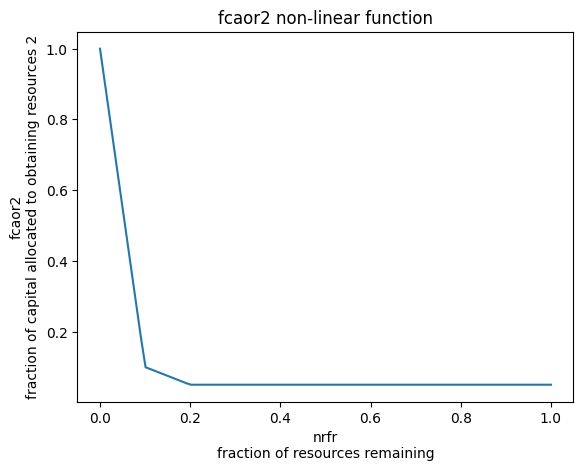

In [95]:
# Afficher la fonction non linéaire servant au calcul d'une variable, par exemple fcaor2
w.plot_non_linearity('fcaor2')

## Affichage des simulations

Attention à bien lancer les simulations avant d'afficher ! 

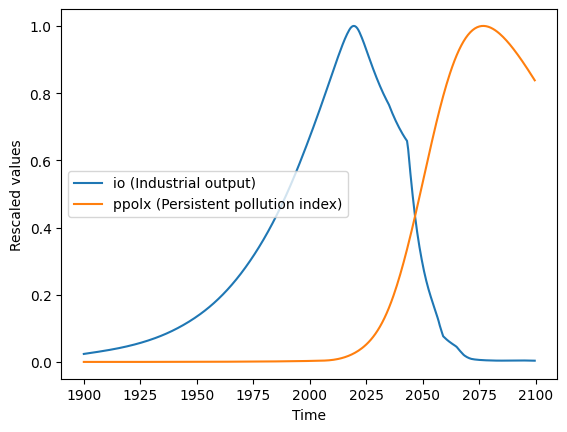

In [96]:
# Afficher des variables en particulier, par exemple io et ppolx et normaliser l'affichage
w.plot(['io', 'ppolx'], rescale=True)

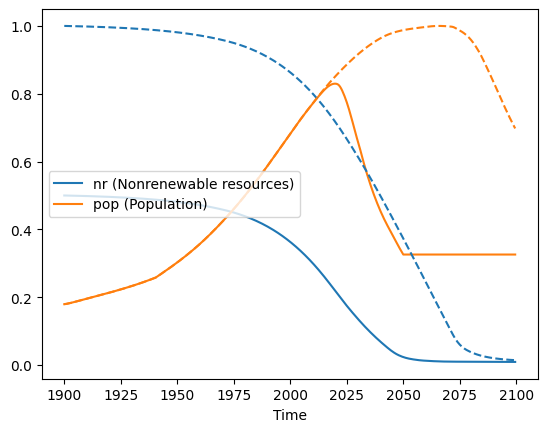

In [97]:
# Comparer 2 systèmes, par exemple w et ws5 avec les variables nr et pop
w.plot_compare(ws5, ['nr', 'pop'], rescale=True)

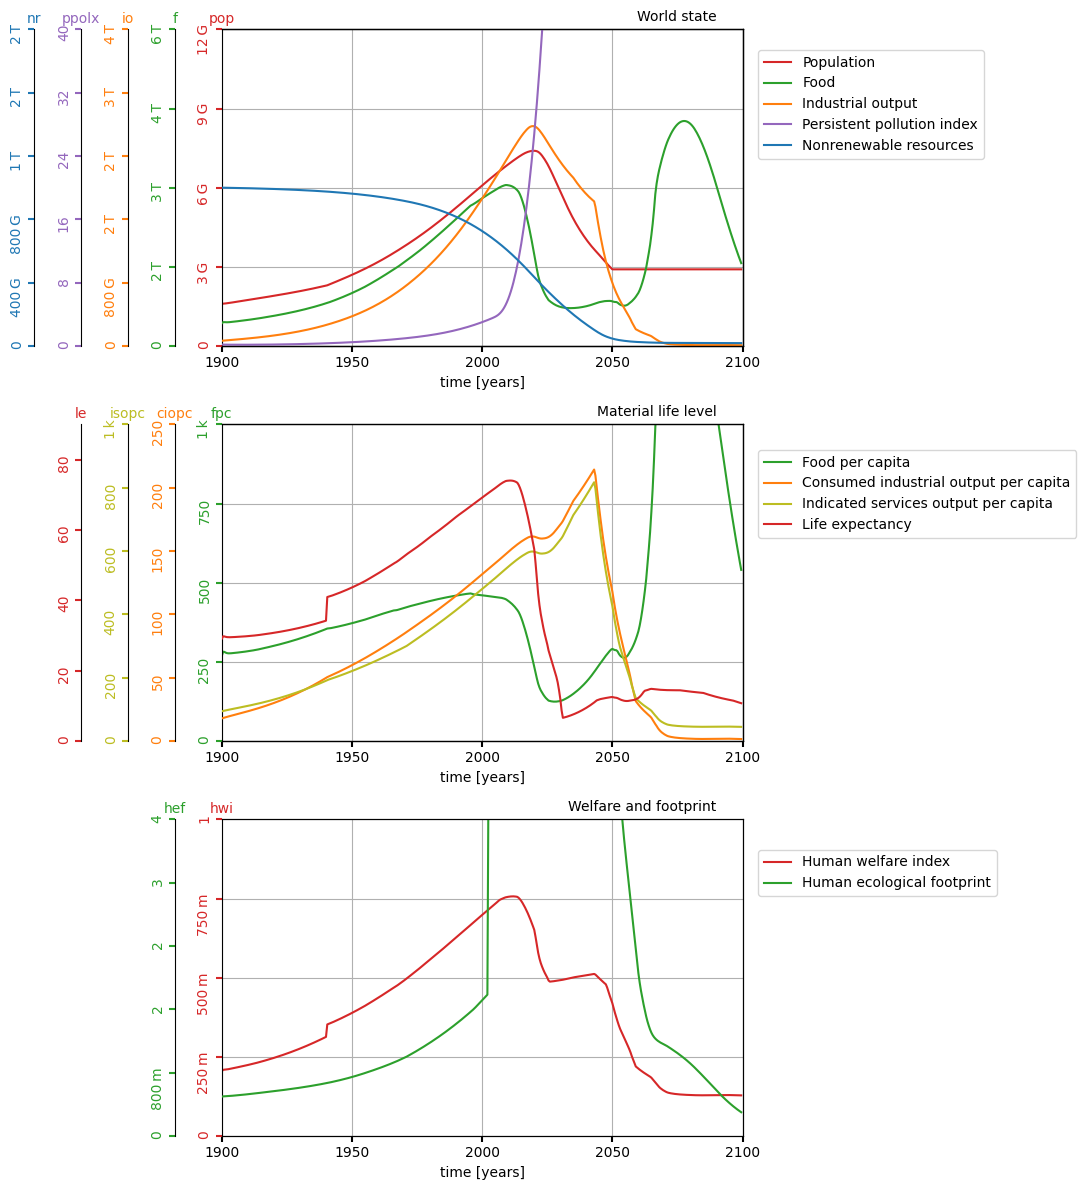

In [98]:
# Affficher les principales variables de Worl3
w.plot_world()

***

# Lire la documentation

Dans la documentation disponible à [cette adresse](https://abaucher.gitlabpages.inria.fr/pydynamo/w3_sectors.html), les variables de tous les secteurs sont définies et expliquées. Sur la page d'une variable ou constante en particulier, par exemple [aiph](https://abaucher.gitlabpages.inria.fr/pydynamo/w3_variables/aiph.html), on peut lire:
- son secteur en couleur
- sa définition et son unité
- son équation 
- le graphe des interactions de la variable, [expliqué ici](https://abaucher.gitlabpages.inria.fr/pydynamo/readgraph.html)
- les autres valeurs qui sont utilisées pour calculer la variable (**in nodes**)
- les autres valeurs qui utilisent la variable pour se calculer (**out nodes**)

***

# Comment World3 a été conçu et implémenté

Le modèle a été conçu de la manière suivante:
1. Les auteur.e.s identifient et décrivent un certain phénomène
2. Iels énumèrent les grandeurs concernées 
3. Iels observent les dynamiques à l'aide d'études empiriques 
4. Iels écrivent les équations, à l'aide de fonctions non linéaires si besoin 
5. Les équations sont converties en langage informatique
6. Lors de la simulation, chaque variable est mise à jour en fonction des valeurs des autres variables

### Par exemple, pour la relation entre pollution et santé
1. La pollution a un impact néfaste sur la santé des gens, via tout un tas de phénomènes biologico-chimiques
2. On va suivre la *pollution* globale ***ppolx*** (**p**ersistent **pol**lution inde**x**) et *l'espérance de vie* globale ***le***  (**l**ife **e**xpectancy) pour simplifier
3. On déduit d'études empiriques que l'espérance de vie évolue de telle manière avec la pollution
4. On va donc écrire que l'espérance de vie ***le*** est un produit de plusieurs variables, dont ***lmp*** (**l**ife **m**ultplier from **p**ollution), un facteur entre 0 et 1 qui caractérise l'impact de la pollution sur la santé:

le = lmp·(autres_variables_etudiées_autre_part)

***lmp*** est lui même calculé à l'aide d'une fonction non-linéaire, qui prend en compte l'indice de pollution globale ***ppolx***, et censé correspondre aux études empiriques:

lmp = NLF_lmp(ppolx)

Avec NLF_lmp la fonction non linéaire.

5. A. On construit la fonction non-linéaire qui lie ***lmp*** et ***ppolx*** à l'aide d'une table de valeurs, qui lie une entrée à sa valeur correspondante dans la table ***lmpt*** (**lmp** **t**able), voir plus d'infos sur la fonction permettant de créer une non linéarité [ici](https://abaucher.gitlabpages.inria.fr/pydynamo/tabhl.html).
5. B. En ajoutant un `.k` pour les signifier les variables à l'instant présent et un `.j` pour l'instant précédent, on obtient la version numérique des équations:

le.k = len*lmf.k*lmhs.k*lmp.k*lmc.k
lmp.k = NLF_lmpt(ppolx.k)
lmpt = [1, 0.99, 0.97, 0.95, 0.90, 0.85, 0.75, 0.65, 0.55, 0.40, 0.20]


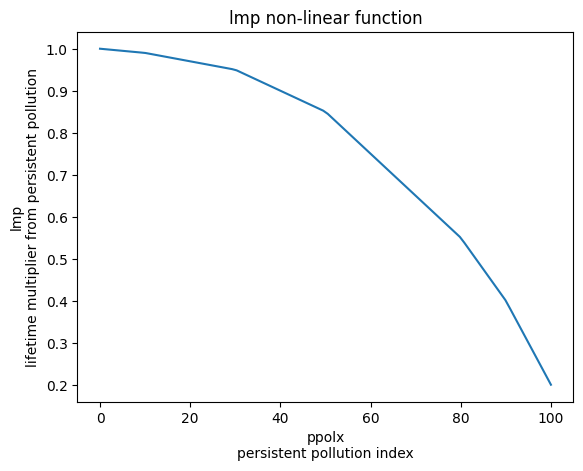

In [99]:
print(w.equation('le'))
print(w.equation('lmp'))
print(w.equation('lmpt'))
w.plot_non_linearity('lmp')

_On voit ici que sans pollution, le facteur est de 1, mais qu'elle peut provoquer une baisse de 80% de l'espérance de vie si l'index de pollution est à son maximum._

6. Après avoir effectué ces étapes pour toutes les variables et secteurs ([ce bouquin de 600 pages](https://archive.org/details/dynamicsofgrowth0000unse/) les expliquent) la simulation est prête a être lancée !

### Les changements de politique
Pour signifier qu'une équation ou qu'une constante va changer à partir d'une certaine date de décision, on écrit la valeur des deux variables, avant et après la décision, et lors de la simulation une d'entre elles est sélectionnée selon la date.

Par exemple, pour décider qu'à partir de 1975 la durée de vie des intrants agricoles ***alai*** (**a**verage **l**ife of **a**gricultural **i**nputs) va passer de 2 à 3 ans, on fixe ***alai1*** à  2, ***alai2*** à 3, la date ***pyear*** à 1975, et on écrit que ***alai*** va être égale à ***alai1*** si ***pyear*** (**p**olitic year) est plus petit que la date actuelle, et à ***alai2*** sinon, avec la fonction [clip](https://abaucher.gitlabpages.inria.fr/pydynamo/clip.html).

In [100]:
w.alai1 = 2
w.alai2 = 3
print(w.equation('pyear'))
print(w.equation('alai')) # alai = alai2 si time >= pyear, et alai1 sinon

pyear = 1975
alai.k = clip(alai2, alai1, time.k, pyear)


### Les effets retardés
Certains impacts mettent un certain temps avant d'influencer les autres.

Par exemple, vu qu'il y a pas mal de stocks de nourriture, la population met un certain temps à réaliser qu'il y a un manque de production. Le ratio de nourriture perçu ***pfr*** (**p**ercieved **f**ood **r**atio) est donc calculé en fonction du ratio de production réel ***fr***, mais avec une atténuation `smooth` comportant un certain délai de perception, ***fspd*** (**f**ood **s**hortage **p**erception **d**elay), fixé ici à 2 ans:

In [101]:
print(w.equation('fspd'))
print(w.equation('pfr'))

fspd = 2
pfr.k = smooth(fr.j, fspd)


## Notes supplémentaires:

- Toutes les variables sont globales, elles représentent la moyenne mondiale, on ne prend pas en compte les disparités

***

# Changer des équations

* _Note: à compléter_

***

# Bonus

***

# Le scenario pas de gachîs

Si on compare la population dans les deux scénarios, on voit qu'elle est plus élevée dans le scénario "pas de gachîs", parce que l'augmentation de la nourriture a un effet positif sur la population. Cependant, cela signifie également que les terres cultivées ***al***, ainsi que la pollution agricole ***ppgao*** (**p**ersistent **p**ollution **g**enerated by **a**griculture **o**utput) et l'érosion ***ler*** (**l**and **e**rosion **r**ate) sont plus élevées et plus rapides. C'est pourquoi la chute de nourriture est plus violente.

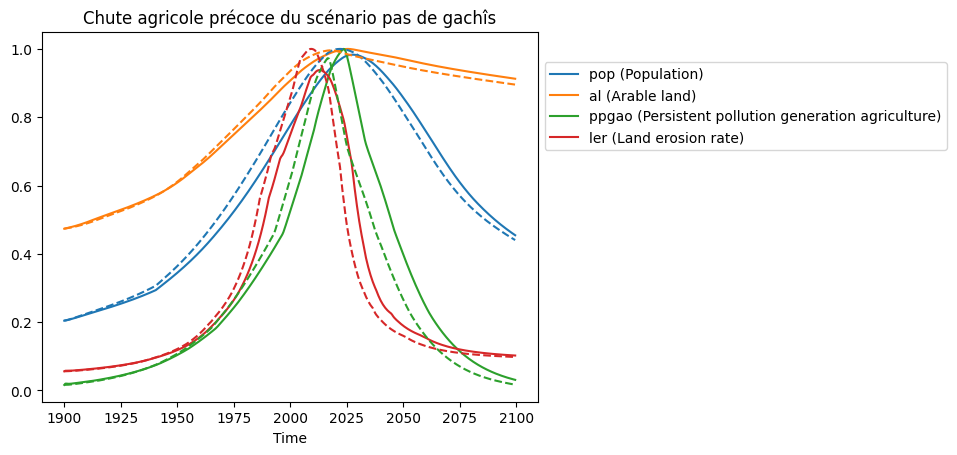

In [102]:
w1 = World3(1)
w1.run()
w1.plot_compare(w_pas_de_gachis, ['pop', 'al', 'ppgao', 'ler'], rescale=True, title="Chute agricole précoce du scénario pas de gachîs")